In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -U mxnet-cu101==1.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |███████████████████████████████▌| 834.1 MB 1.1 MB/s eta 0:00:11tcmalloc: large alloc 1147494400 bytes == 0x39494000 @  0x7f0469201615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████████████████████| 846.0 MB 22 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [3]:
!nvidia-smi

Mon Nov 14 11:47:08 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**inceptionv3**

finetune

In [4]:
# -*- coding: utf-8 -*-
import os
import tensorflow as tf #tf 2.0.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Dataset2_split/train'
valid_path = '/content/drive/MyDrive/Dataset2_split/val'

In [7]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [8]:
# The last 12 layers fine tune
for layer in inception.layers[:-12]:
    layer.trainable = False

In [ ]:
# The last 12 layers fine tune
for layer in inception.layers[:-6]:
    layer.trainable = False

In [ ]:
# The last 12 layers fine tune
for layer in inception.layers[:-3]:
    layer.trainable = False

In [ ]:
# The last 12 layers fine tune
for layer in inception.layers[:-5]:
    layer.trainable = False

In [ ]:
# The last 12 layers fine tune
for layer in inception.layers[:-7]:
    layer.trainable = False

In [9]:
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=4, activation='softmax')(x)
model = Model(inception.input, output)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [11]:
inception = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# The last 15 layers fine tune
for layer in inception.layers[:-12]:
    layer.trainable = False
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=4, activation='softmax')(x)
model = Model(inception.input, output)
model.summary() 

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [ ]:
inception = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# The last 15 layers fine tune
for layer in inception.layers[:-11]:
    layer.trainable = False
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=4, activation='softmax')(x)
model = Model(inception.input, output)
model.summary() 

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_282 (Conv2D)            (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_282 (Batch  (None, 111, 111, 32  96         ['conv2d_282[0][0]']             
 Normalization)                 )                                                           

In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset2_split/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical'
                                                )

Found 4743 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset2_split/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical'
                                            , shuffle=False )

Found 1189 images belonging to 4 classes.


In [15]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [16]:
import time

# fit the model
# Run the cell. It will take some time to execute

start = time.time()

lrr = ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)


callbacks = [lrr]

t6 = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks,
)

print('Running time: %.4f seconds' % (time.time()-start))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
149/149 [==============================] - 1114s 7s/step - loss: 0.2936 - accuracy: 0.8906 - val_loss: 0.0852 - val_accuracy: 0.9722 - lr: 0.0010
Epoch 2/30
149/149 [==============================] - 30s 204ms/step - loss: 0.0478 - accuracy: 0.9842 - val_loss: 0.0404 - val_accuracy: 0.9832 - lr: 0.0010
Epoch 3/30
149/149 [==============================] - 25s 169ms/step - loss: 0.0382 - accuracy: 0.9884 - val_loss: 0.0461 - val_accuracy: 0.9865 - lr: 0.0010
Epoch 4/30
149/149 [==============================] - 25s 169ms/step - loss: 0.0184 - accuracy: 0.9935 - val_loss: 0.0188 - val_accuracy: 0.9933 - lr: 0.0010
Epoch 5/30
149/149 [==============================] - 26s 175ms/step - loss: 0.0385 - accuracy: 0.9869 - val_loss: 0.0405 - val_accuracy: 0.9916 - lr: 0.0010
Epoch 6/30
149/149 [==============================] - 26s 172ms/step - loss: 0.0086 - accuracy: 0.9970 - val_loss: 0.0049 - val_accuracy: 0.9975 - lr: 0.0010
Epoch 7/30
149/149 [==============================] -

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
#y_pred
y_test=test_set.classes
cf_matrix =confusion_matrix(y_test, y_pred)
print(cf_matrix)

38/38 [==============================] - 6s 128ms/step
[[317   0   0   0]
 [  0 288   2   0]
 [  0   0 320   0]
 [  0   0   0 262]]


In [18]:
#Get the accuracy score v2
batch_size=32

test_score = model.evaluate_generator(test_set, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


[INFO] accuracy: 99.80%
[INFO] Loss:  0.010912799276411533


In [20]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=model.predict(test_set)
y_pred=np.argmax(y_pred,axis=1)
test_y=test_set.classes
#get classification report
target_names = ['1','2','3','4']

print(classification_report(y_pred,test_y, target_names=target_names))

#get confusion matrix
print(confusion_matrix(y_pred,test_y ))

38/38 [==============================] - 6s 159ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       317
           2       0.99      1.00      1.00       288
           3       1.00      0.99      1.00       322
           4       1.00      1.00      1.00       262

    accuracy                           1.00      1189
   macro avg       1.00      1.00      1.00      1189
weighted avg       1.00      1.00      1.00      1189

[[317   0   0   0]
 [  0 288   0   0]
 [  0   2 320   0]
 [  0   0   0 262]]


In [34]:
for i, layer in enumerate(model.layers):
    print(i,'\t',layer.trainable,'\t  :',layer.name)

0 	 False 	  : input_2
1 	 False 	  : conv2d_94
2 	 False 	  : batch_normalization_94
3 	 False 	  : activation_94
4 	 False 	  : conv2d_95
5 	 False 	  : batch_normalization_95
6 	 False 	  : activation_95
7 	 False 	  : conv2d_96
8 	 False 	  : batch_normalization_96
9 	 False 	  : activation_96
10 	 False 	  : max_pooling2d_4
11 	 False 	  : conv2d_97
12 	 False 	  : batch_normalization_97
13 	 False 	  : activation_97
14 	 False 	  : conv2d_98
15 	 False 	  : batch_normalization_98
16 	 False 	  : activation_98
17 	 False 	  : max_pooling2d_5
18 	 False 	  : conv2d_102
19 	 False 	  : batch_normalization_102
20 	 False 	  : activation_102
21 	 False 	  : conv2d_100
22 	 False 	  : conv2d_103
23 	 False 	  : batch_normalization_100
24 	 False 	  : batch_normalization_103
25 	 False 	  : activation_100
26 	 False 	  : activation_103
27 	 False 	  : average_pooling2d_9
28 	 False 	  : conv2d_99
29 	 False 	  : conv2d_101
30 	 False 	  : conv2d_104
31 	 False 	  : conv2d_105
32 	 False

In [43]:
sparsified_weights = []
for w in model.get_layer(name='flatten_1').get_weights():
    sparsified_weights.append(w)

In [44]:
x = (model.layers[-12].output)

new_model= Model(model.input,x)

In [45]:
for i, layer in enumerate(new_model.layers):
    print(i,'\t',layer.trainable,'\t  :',layer.name)

0 	 False 	  : input_2
1 	 False 	  : conv2d_94
2 	 False 	  : batch_normalization_94
3 	 False 	  : activation_94
4 	 False 	  : conv2d_95
5 	 False 	  : batch_normalization_95
6 	 False 	  : activation_95
7 	 False 	  : conv2d_96
8 	 False 	  : batch_normalization_96
9 	 False 	  : activation_96
10 	 False 	  : max_pooling2d_4
11 	 False 	  : conv2d_97
12 	 False 	  : batch_normalization_97
13 	 False 	  : activation_97
14 	 False 	  : conv2d_98
15 	 False 	  : batch_normalization_98
16 	 False 	  : activation_98
17 	 False 	  : max_pooling2d_5
18 	 False 	  : conv2d_102
19 	 False 	  : batch_normalization_102
20 	 False 	  : activation_102
21 	 False 	  : conv2d_100
22 	 False 	  : conv2d_103
23 	 False 	  : batch_normalization_100
24 	 False 	  : batch_normalization_103
25 	 False 	  : activation_100
26 	 False 	  : activation_103
27 	 False 	  : average_pooling2d_9
28 	 False 	  : conv2d_99
29 	 False 	  : conv2d_101
30 	 False 	  : conv2d_104
31 	 False 	  : conv2d_105
32 	 False

In [48]:
output  = Dense(units=10, activation='softmax')(model.layers[-12].output)
new_model= Model(model.input, output)

In [ ]:
import time

# fit the model
# Run the cell. It will take some time to execute

start = time.time()

lrr = ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)


callbacks = [lrr]

t11 = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks,
)

print('Running time: %.4f seconds' % (time.time()-start))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
149/149 [==============================] - 33s 181ms/step - loss: 0.4717 - accuracy: 0.8197 - val_loss: 0.1877 - val_accuracy: 0.9302 - lr: 0.0010
Epoch 2/30
149/149 [==============================] - 25s 170ms/step - loss: 0.1952 - accuracy: 0.9296 - val_loss: 0.1484 - val_accuracy: 0.9479 - lr: 0.0010
Epoch 3/30
149/149 [==============================] - 26s 174ms/step - loss: 0.1017 - accuracy: 0.9627 - val_loss: 0.0586 - val_accuracy: 0.9798 - lr: 0.0010
Epoch 4/30
149/149 [==============================] - 25s 169ms/step - loss: 0.0657 - accuracy: 0.9749 - val_loss: 0.1162 - val_accuracy: 0.9596 - lr: 0.0010
Epoch 5/30
149/149 [==============================] - 30s 200ms/step - loss: 0.0545 - accuracy: 0.9810 - val_loss: 0.0401 - val_accuracy: 0.9882 - lr: 0.0010
Epoch 6/30
149/149 [==============================] - 25s 170ms/step - loss: 0.0563 - accuracy: 0.9779 - val_loss: 0.0329 - val_accuracy: 0.9891 - lr: 0.0010
Epoch 7/30
149/149 [==============================] 

In [ ]:
#Get the accuracy score
#t7_2
batch_size=32
test_score = model.evaluate_generator(test_set, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


[INFO] accuracy: 100.00%
[INFO] Loss:  0.00028091028798371553


In [ ]:
#Get the accuracy score
#t7_2
batch_size=32
test_score = model.evaluate_generator(test_set, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


[INFO] accuracy: 99.22%
[INFO] Loss:  0.03327139467000961


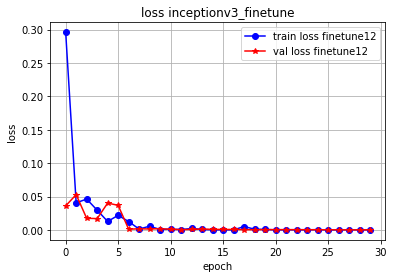

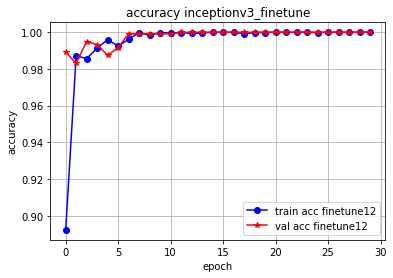

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(t6.history['loss'],'-o', color='b', label='train loss finetune12')
plt.plot(t6.history['val_loss'], '-*', color='r', label='val loss finetune12')
#plt.plot(k.history['loss'],'-^', color='C2', label='train loss finetune11')
#plt.plot(k.history['val_loss'], '-<', color='C1', label='val loss finetune11')

plt.legend()
plt.grid()
plt.title("loss inceptionv3_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(t6.history['accuracy'],'-o', color='b', label='train acc finetune12')
plt.plot(t6.history['val_accuracy'], '-*', color='r', label='val acc finetune12')
#plt.plot(k.history['accuracy'],'-^', color='C2', label='train acc finetune11')
#plt.plot(k.history['val_accuracy'], '-<', color='C1', label='val acc finetune11')

plt.legend()
plt.title("accuracy inceptionv3_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

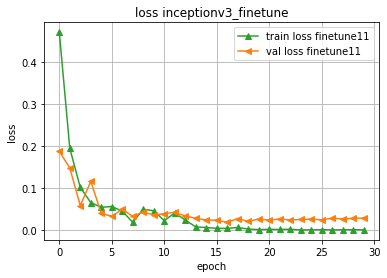

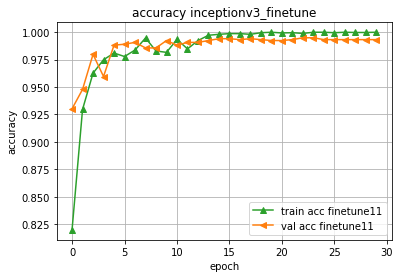

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

#plt.plot(t6.history['loss'],'-o', color='b', label='train loss finetune12')
#plt.plot(t6.history['val_loss'], '-*', color='r', label='val loss finetune12')
plt.plot(t11.history['loss'],'-^', color='C2', label='train loss finetune11')
plt.plot(t11.history['val_loss'], '-<', color='C1', label='val loss finetune11')

plt.legend()
plt.grid()
plt.title("loss inceptionv3_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
#plt.plot(t6.history['accuracy'],'-o', color='b', label='train acc finetune12')
#plt.plot(t6.history['val_accuracy'], '-*', color='r', label='val acc finetune12')
plt.plot(t11.history['accuracy'],'-^', color='C2', label='train acc finetune11')
plt.plot(t11.history['val_accuracy'], '-<', color='C1', label='val acc finetune11')

plt.legend()
plt.title("accuracy inceptionv3_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

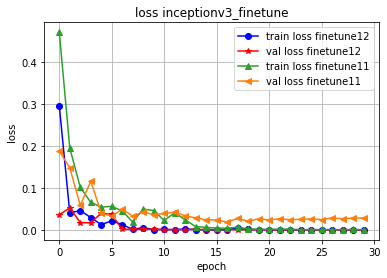

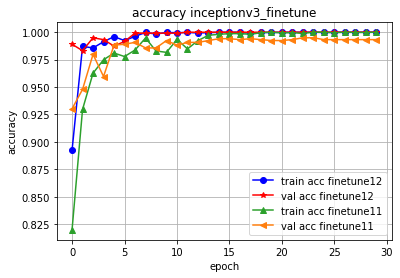

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(t6.history['loss'],'-o', color='b', label='train loss finetune12')
plt.plot(t6.history['val_loss'], '-*', color='r', label='val loss finetune12')
plt.plot(t11.history['loss'],'-^', color='C2', label='train loss finetune11')
plt.plot(t11.history['val_loss'], '-<', color='C1', label='val loss finetune11')

plt.legend()
plt.grid()
plt.title("loss inceptionv3_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(t6.history['accuracy'],'-o', color='b', label='train acc finetune12')
plt.plot(t6.history['val_accuracy'], '-*', color='r', label='val acc finetune12')
plt.plot(t11.history['accuracy'],'-^', color='C2', label='train acc finetune11')
plt.plot(t11.history['val_accuracy'], '-<', color='C1', label='val acc finetune11')

plt.legend()
plt.title("accuracy inceptionv3_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

In [ ]:
import time

# fit the model
# Run the cell. It will take some time to execute

start = time.time()

lrr = ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)


callbacks = [lrr]

tune = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks,
)

print('Running time: %.4f seconds' % (time.time()-start))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
149/149 [==============================] - 1228s 8s/step - loss: 0.2927 - accuracy: 0.8895 - val_loss: 0.0460 - val_accuracy: 0.9865 - lr: 0.0010
Epoch 2/30
149/149 [==============================] - 35s 233ms/step - loss: 0.0591 - accuracy: 0.9791 - val_loss: 0.0141 - val_accuracy: 0.9941 - lr: 0.0010
Epoch 3/30
149/149 [==============================] - 34s 230ms/step - loss: 0.0638 - accuracy: 0.9800 - val_loss: 0.0086 - val_accuracy: 0.9966 - lr: 0.0010
Epoch 4/30
149/149 [==============================] - 34s 229ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.0167 - val_accuracy: 0.9950 - lr: 0.0010
Epoch 5/30
149/149 [==============================] - 35s 231ms/step - loss: 0.0147 - accuracy: 0.9943 - val_loss: 0.0094 - val_accuracy: 0.9975 - lr: 0.0010
Epoch 6/30
149/149 [==============================] - 34s 231ms/step - loss: 0.0258 - accuracy: 0.9926 - val_loss: 0.0197 - val_accuracy: 0.9941 - lr: 0.0010
Epoch 7/30
149/149 [==============================] -

In [ ]:
import time

# fit the model
# Run the cell. It will take some time to execute

start = time.time()

lrr = ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)


callbacks = [lrr]

t = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks,
)

print('Running time: %.4f seconds' % (time.time()-start))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
149/149 [==============================] - 44s 250ms/step - loss: 0.0964 - accuracy: 0.9633 - val_loss: 0.0054 - val_accuracy: 0.9983 - lr: 0.0010
Epoch 2/30
149/149 [==============================] - 36s 243ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0012 - val_accuracy: 0.9992 - lr: 0.0010
Epoch 3/30
149/149 [==============================] - 43s 286ms/step - loss: 0.1089 - accuracy: 0.9781 - val_loss: 0.0039 - val_accuracy: 0.9992 - lr: 0.0010
Epoch 4/30
149/149 [==============================] - 35s 237ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.0142 - val_accuracy: 0.9975 - lr: 0.0010
Epoch 5/30
149/149 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 0.9983
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
149/149 [==============================] - 35s 236ms/step - loss: 0.0035 - accuracy: 0.9983 - val_loss: 0.0022 - val_accuracy: 0.9992 - lr: 0.0010
Epoch 6/30
149/149 [=============================

In [ ]:
import time

# fit the model
# Run the cell. It will take some time to execute

start = time.time()

lrr = ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)


callbacks = [lrr]

c = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks,
)

print('Running time: %.4f seconds' % (time.time()-start))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
149/149 [==============================] - 48s 264ms/step - loss: 0.4662 - accuracy: 0.8221 - val_loss: 0.1301 - val_accuracy: 0.9546 - lr: 0.0010
Epoch 2/30
149/149 [==============================] - 34s 228ms/step - loss: 0.1666 - accuracy: 0.9416 - val_loss: 0.1491 - val_accuracy: 0.9479 - lr: 0.0010
Epoch 3/30
149/149 [==============================] - 35s 232ms/step - loss: 0.0756 - accuracy: 0.9743 - val_loss: 0.0438 - val_accuracy: 0.9849 - lr: 0.0010
Epoch 4/30
149/149 [==============================] - 34s 226ms/step - loss: 0.0661 - accuracy: 0.9770 - val_loss: 0.0242 - val_accuracy: 0.9882 - lr: 0.0010
Epoch 5/30
149/149 [==============================] - 34s 225ms/step - loss: 0.0658 - accuracy: 0.9774 - val_loss: 0.0331 - val_accuracy: 0.9882 - lr: 0.0010
Epoch 6/30
149/149 [==============================] - 34s 228ms/step - loss: 0.0522 - accuracy: 0.9810 - val_loss: 0.0431 - val_accuracy: 0.9874 - lr: 0.0010
Epoch 7/30
149/149 [==============================] 

In [ ]:
import time

# fit the model
# Run the cell. It will take some time to execute

start = time.time()

lrr = ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)


callbacks = [lrr]

v = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks,
)

print('Running time: %.4f seconds' % (time.time()-start))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
149/149 [==============================] - 42s 240ms/step - loss: 0.4914 - accuracy: 0.8149 - val_loss: 0.1382 - val_accuracy: 0.9521 - lr: 0.0010
Epoch 2/30
149/149 [==============================] - 48s 323ms/step - loss: 0.1562 - accuracy: 0.9401 - val_loss: 0.0741 - val_accuracy: 0.9807 - lr: 0.0010
Epoch 3/30
149/149 [==============================] - 38s 253ms/step - loss: 0.0811 - accuracy: 0.9734 - val_loss: 0.0588 - val_accuracy: 0.9807 - lr: 0.0010
Epoch 4/30
149/149 [==============================] - 34s 229ms/step - loss: 0.0822 - accuracy: 0.9713 - val_loss: 0.0559 - val_accuracy: 0.9815 - lr: 0.0010
Epoch 5/30
149/149 [==============================] - 35s 234ms/step - loss: 0.0767 - accuracy: 0.9715 - val_loss: 0.0504 - val_accuracy: 0.9882 - lr: 0.0010
Epoch 6/30
149/149 [==============================] - 35s 233ms/step - loss: 0.0437 - accuracy: 0.9840 - val_loss: 0.0515 - val_accuracy: 0.9891 - lr: 0.0010
Epoch 7/30
149/149 [==============================] 

In [ ]:
import time

# fit the model
# Run the cell. It will take some time to execute

start = time.time()

lrr = ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)


callbacks = [lrr]

m = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks,
)

print('Running time: %.4f seconds' % (time.time()-start))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
149/149 [==============================] - 45s 264ms/step - loss: 0.4798 - accuracy: 0.8164 - val_loss: 0.1620 - val_accuracy: 0.9453 - lr: 0.0010
Epoch 2/30
149/149 [==============================] - 34s 228ms/step - loss: 0.1416 - accuracy: 0.9507 - val_loss: 0.1256 - val_accuracy: 0.9554 - lr: 0.0010
Epoch 3/30
149/149 [==============================] - 35s 233ms/step - loss: 0.1081 - accuracy: 0.9591 - val_loss: 0.1105 - val_accuracy: 0.9689 - lr: 0.0010
Epoch 4/30
149/149 [==============================] - 34s 228ms/step - loss: 0.0738 - accuracy: 0.9747 - val_loss: 0.0628 - val_accuracy: 0.9781 - lr: 0.0010
Epoch 5/30
149/149 [==============================] - 34s 228ms/step - loss: 0.0483 - accuracy: 0.9842 - val_loss: 0.0338 - val_accuracy: 0.9874 - lr: 0.0010
Epoch 6/30
149/149 [==============================] - 35s 231ms/step - loss: 0.0299 - accuracy: 0.9903 - val_loss: 0.0634 - val_accuracy: 0.9849 - lr: 0.0010
Epoch 7/30
149/149 [==============================] 

In [ ]:
import time

# fit the model
# Run the cell. It will take some time to execute

start = time.time()

lrr = ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)


callbacks = [lrr]

t7 = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks,
)

print('Running time: %.4f seconds' % (time.time()-start))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
149/149 [==============================] - 1505s 10s/step - loss: 0.4933 - accuracy: 0.8105 - val_loss: 0.1521 - val_accuracy: 0.9479 - lr: 0.0010
Epoch 2/30
149/149 [==============================] - 25s 167ms/step - loss: 0.1382 - accuracy: 0.9519 - val_loss: 0.1048 - val_accuracy: 0.9664 - lr: 0.0010
Epoch 3/30
149/149 [==============================] - 25s 168ms/step - loss: 0.0899 - accuracy: 0.9684 - val_loss: 0.0928 - val_accuracy: 0.9647 - lr: 0.0010
Epoch 4/30
149/149 [==============================] - 25s 166ms/step - loss: 0.0797 - accuracy: 0.9690 - val_loss: 0.0364 - val_accuracy: 0.9899 - lr: 0.0010
Epoch 5/30
149/149 [==============================] - 25s 166ms/step - loss: 0.0507 - accuracy: 0.9838 - val_loss: 0.0972 - val_accuracy: 0.9655 - lr: 0.0010
Epoch 6/30
149/149 [==============================] - 25s 167ms/step - loss: 0.0727 - accuracy: 0.9743 - val_loss: 0.0489 - val_accuracy: 0.9840 - lr: 0.0010
Epoch 7/30
149/149 [==============================] 

In [ ]:
#Get the accuracy score
batch_size=32
test_score = model.evaluate_generator(test_set, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


[INFO] accuracy: 100.00%
[INFO] Loss:  0.00027543120086193085


In [ ]:
#Get the accuracy score
batch_size=32
test_score = model.evaluate_generator(test_set, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


[INFO] accuracy: 99.80%
[INFO] Loss:  0.0034186437260359526


In [ ]:
#Get the accuracy score
batch_size=32
test_score = model.evaluate_generator(test_set, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


[INFO] accuracy: 100.00%
[INFO] Loss:  0.00025553820887580514


In [ ]:
#Get the accuracy score
batch_size=32
test_score = model.evaluate_generator(test_set, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


[INFO] accuracy: 99.32%
[INFO] Loss:  0.035744793713092804


In [ ]:
#Get the accuracy score
batch_size=32
test_score = model.evaluate_generator(test_set, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


[INFO] accuracy: 99.61%
[INFO] Loss:  0.027901049703359604


In [ ]:
#Get the accuracy score
batch_size=32
test_score = model.evaluate_generator(test_set, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


[INFO] accuracy: 99.02%
[INFO] Loss:  0.04164298251271248


In [ ]:
#Get the accuracy score
#t7_2
batch_size=32
test_score = model.evaluate_generator(test_set, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


[INFO] accuracy: 99.12%
[INFO] Loss:  0.03957778960466385


In [ ]:
# save it as a h5 file
import tensorflow as tf

model.save('model_inceptionv3finetune12.h5')

In [ ]:
# save it as a h5 file
import tensorflow as tf

model.save('model_inceptionv3finetune7.h5')

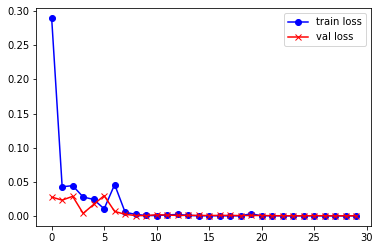

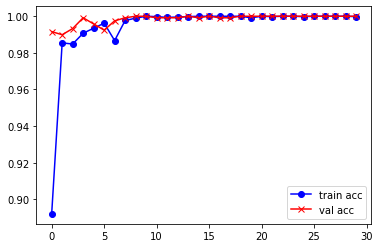

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(tune.history['loss'],'b-o', label='train loss')
plt.plot(tune.history['val_loss'], 'r-x', label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(tune.history['accuracy'],'b-o', label='train acc')
plt.plot(tune.history['val_accuracy'], 'r-x', label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')

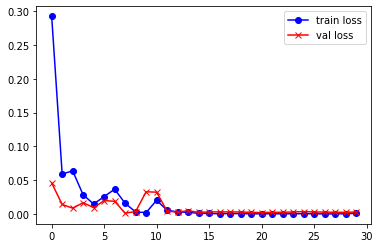

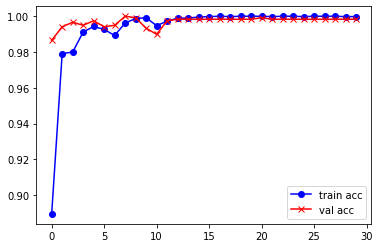

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(tune.history['loss'],'b-o', label='train loss')
plt.plot(tune.history['val_loss'], 'r-x', label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(tune.history['accuracy'],'b-o', label='train acc')
plt.plot(tune.history['val_accuracy'], 'r-x', label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')

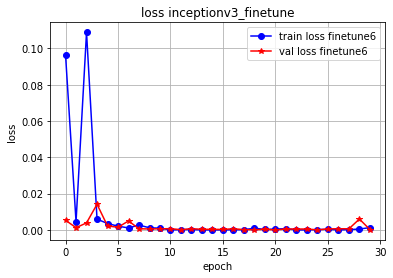

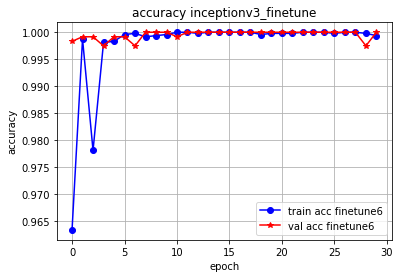

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(t.history['loss'],'-o', color='b', label='train loss finetune6')
plt.plot(t.history['val_loss'], '-*', color='r', label='val loss finetune6')
#plt.plot(k.history['loss'],'-^', color='C2', label='train loss finetune11')
#plt.plot(k.history['val_loss'], '-<', color='C1', label='val loss finetune11')

plt.legend()
plt.grid()
plt.title("loss inceptionv3_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(t.history['accuracy'],'-o', color='b', label='train acc finetune6')
plt.plot(t.history['val_accuracy'], '-*', color='r', label='val acc finetune6')
#plt.plot(k.history['accuracy'],'-^', color='C2', label='train acc finetune11')
#plt.plot(k.history['val_accuracy'], '-<', color='C1', label='val acc finetune11')

plt.legend()
plt.title("accuracy inceptionv3_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

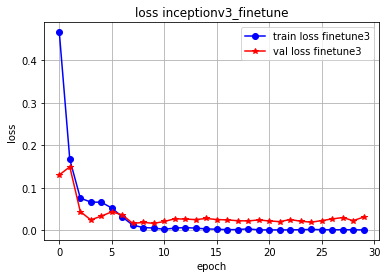

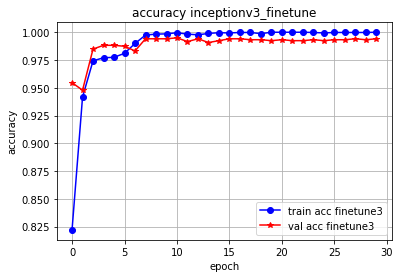

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(c.history['loss'],'-o', color='b', label='train loss finetune3')
plt.plot(c.history['val_loss'], '-*', color='r', label='val loss finetune3')
#plt.plot(k.history['loss'],'-^', color='C2', label='train loss finetune11')
#plt.plot(k.history['val_loss'], '-<', color='C1', label='val loss finetune11')

plt.legend()
plt.grid()
plt.title("loss inceptionv3_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(c.history['accuracy'],'-o', color='b', label='train acc finetune3')
plt.plot(c.history['val_accuracy'], '-*', color='r', label='val acc finetune3')
#plt.plot(k.history['accuracy'],'-^', color='C2', label='train acc finetune11')
#plt.plot(k.history['val_accuracy'], '-<', color='C1', label='val acc finetune11')

plt.legend()
plt.title("accuracy inceptionv3_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

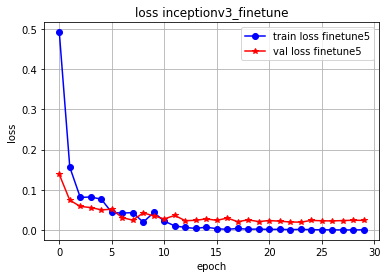

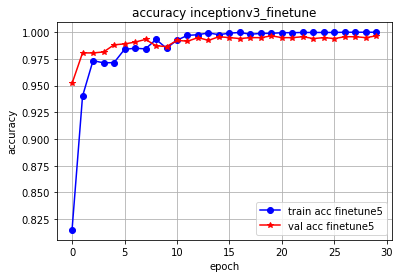

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(v.history['loss'],'-o', color='b', label='train loss finetune5')
plt.plot(v.history['val_loss'], '-*', color='r', label='val loss finetune5')

plt.legend()
plt.grid()
plt.title("loss inceptionv3_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(v.history['accuracy'],'-o', color='b', label='train acc finetune5')
plt.plot(v.history['val_accuracy'], '-*', color='r', label='val acc finetune5')


plt.legend()
plt.title("accuracy inceptionv3_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

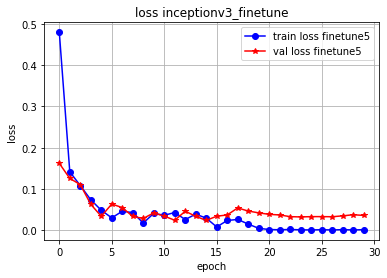

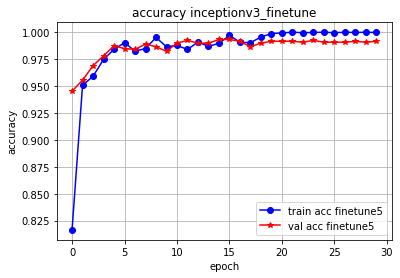

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(m.history['loss'],'-o', color='b', label='train loss finetune5')
plt.plot(m.history['val_loss'], '-*', color='r', label='val loss finetune5')

plt.legend()
plt.grid()
plt.title("loss inceptionv3_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(m.history['accuracy'],'-o', color='b', label='train acc finetune5')
plt.plot(m.history['val_accuracy'], '-*', color='r', label='val acc finetune5')


plt.legend()
plt.title("accuracy inceptionv3_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

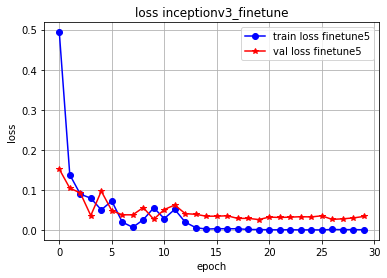

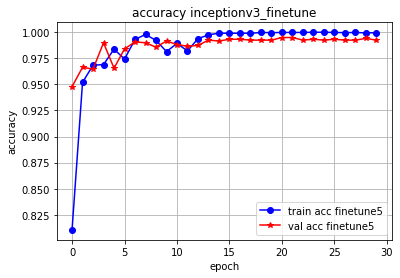

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(t7.history['loss'],'-o', color='b', label='train loss finetune5')
plt.plot(t7.history['val_loss'], '-*', color='r', label='val loss finetune5')

plt.legend()
plt.grid()
plt.title("loss inceptionv3_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(t7.history['accuracy'],'-o', color='b', label='train acc finetune5')
plt.plot(t7.history['val_accuracy'], '-*', color='r', label='val acc finetune5')


plt.legend()
plt.title("accuracy inceptionv3_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
#y_pred
test_y=test_set.classes
cf_matrix =confusion_matrix(test_y, y_pred)
print(cf_matrix )

[[313   4   0   0]
 [  0 288   2   0]
 [  0   2 318   0]
 [  0   0   0 262]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
#y_pred
test_y=test_set.classes
cf_matrix =confusion_matrix(test_y, y_pred)
print(cf_matrix )

[[313   4   0   0]
 [  0 286   4   0]
 [  0   2 318   0]
 [  0   0   0 262]]


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=model.predict(test_set)
y_pred=np.argmax(y_pred,axis=1)
test_y=test_set.classes
#get classification report
target_names = ['Bacterialblight', 'Blast','Brownspot','Tungro']

print(classification_report(y_pred,test_y, target_names=target_names))

#get confusion matrix
print(confusion_matrix(y_pred,test_y ))

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=model.predict(test_set)
y_pred=np.argmax(y_pred,axis=1)
test_y=test_set.classes
#get classification report
target_names = ['Bacterialblight', 'Blast','Brownspot','Tungro']

print(classification_report(y_pred,test_y, target_names=target_names))

#get confusion matrix
print(confusion_matrix(y_pred,test_y ))

                 precision    recall  f1-score   support

Bacterialblight       0.99      1.00      0.99       313
          Blast       0.99      0.98      0.99       294
      Brownspot       0.99      0.99      0.99       320
         Tungro       1.00      1.00      1.00       262

       accuracy                           0.99      1189
      macro avg       0.99      0.99      0.99      1189
   weighted avg       0.99      0.99      0.99      1189

[[313   0   0   0]
 [  4 288   2   0]
 [  0   2 318   0]
 [  0   0   0 262]]


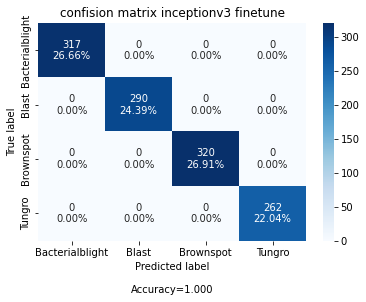

In [ ]:
import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Bacterialblight', 'Blast','Brownspot','Tungro']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',title='confision matrix inceptionv3 finetune')
plt.savefig('confision matrix inceptionv3 finetune.png')

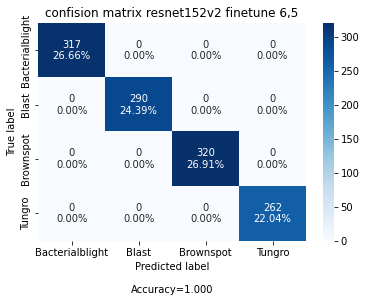

In [ ]:
import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Bacterialblight', 'Blast','Brownspot','Tungro']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',title='confision matrix resnet152v2 finetune 6,5')
plt.savefig('confision matrix resnet152v2 finetune(5,6).png')

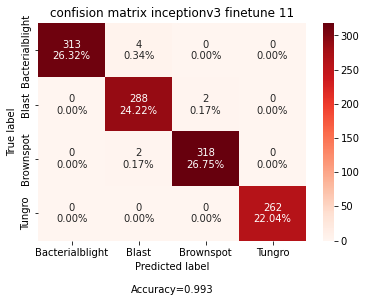

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Bacterialblight', 'Blast','Brownspot','Tungro']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Reds',title='confision matrix inceptionv3 finetune 11') 
plt.savefig('confision matrix inceptionv3 finetune.png')
#,figsize=(10,6)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

withoutfinetune

In [ ]:
import os
import shutil
from os.path import isfile, join, abspath, exists, isdir, expanduser
from os import listdir, makedirs, getcwd, remove
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import matplotlib.image as mimg
# plotly
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

import tensorflow as tf
from plotly.graph_objs import *
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras import layers
from keras import models
from keras import optimizers

In [ ]:
conv_base = tf.keras.applications.vgg16.VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
conv_base.summary()

In [ ]:
base_dir = '/content/drive/MyDrive/Dataset2_split'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
import os
len(os.listdir(train_dir))

4

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

In [ ]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 5, 5, 2048))
    labels = np.zeros(shape=(sample_count, 4))

    generator = ImageDataGenerator(rescale=1./255).flow_from_directory(directory,
        target_size=(224, 224,),
        batch_size = batch_size, 
        class_mode='categorical')

    i = 0

    print('Entering for loop...');

    
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [ ]:
train_features, train_labels = extract_features(train_dir, 4743)
validation_features, validation_labels = extract_features(validation_dir, 1189)

Found 4743 images belonging to 4 classes.
Entering for loop...
Found 1189 images belonging to 4 classes.
Entering for loop...


In [ ]:
train_features = np.reshape(train_features, ( 4743, 5* 5* 2048))
validation_features = np.reshape(validation_features, (1189, 5* 5* 2048))

In [ ]:
model = models.Sequential()
model.add(layers.Dense(8192, activation='relu', input_dim=5* 5* 2048))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, activation='relu', input_dim=5* 5* 2048))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu', input_dim=5* 5* 2048))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu', input_dim=5* 5* 2048))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
r = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=16,
                    validation_data=(validation_features, validation_labels))

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(epochs, acc, 'bo', label='Training acc')
axes[0].plot(epochs, val_acc, 'b', label='Validation acc')
axes[0].legend()

axes[1].plot(epochs, loss, 'bo', label='Training loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation loss')
axes[1].yaxis.set_label_position("right")
axes[1].legend()

plt.show()

In [ ]:
model_1_val = val_acc[-1]
print("Validation Accuracy: ", model_1_val)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(validation_features)
y_pred = np.argmax(y_pred, axis=1)
#y_pred
test_y=validation_labels.argmax(1)
print(confusion_matrix(test_y, y_pred))


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=model.predict(validation_features)
y_pred=np.argmax(y_pred,axis=1)
test_y=validation_labels.argmax(1)
#get classification report
print(classification_report(y_pred,test_y))

#get confusion matrix

print(confusion_matrix(y_pred,test_y))

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(epochs, acc, 'b-o', label='Training acc without finetune')
axes[0].plot(epochs, val_acc, 'r-^', label='Validation acc  without finetune')
axes[0].legend()

axes[1].plot(epochs, loss, 'b-o', label='Training loss  without finetune')
axes[1].plot(epochs, val_loss, 'r-^', label='Validation loss  without finetune')
axes[1].yaxis.set_label_position("right")
axes[1].legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(tune.history['loss'],'b-o' , label='train loss tune')
plt.plot(tune.history['val_loss'],'r-^' , label='val loss tune')
plt.plot(history.history['loss'],'c-s' , label='train loss without tune')
plt.plot(history.history['val_loss'],'m-v' , label='val loss without tune')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(tune.history['accuracy'],'b-o' , label='train acc tune')
plt.plot(tune.history['val_accuracy'], 'r-^' , label='val acc tune')
plt.plot(history.history['acc'],'c-s' , label='train acc without tune')
plt.plot(history.history['val_acc'],'m-v' , label='val acc without tune')
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')

In [ ]:
plt.plot(tune.history['loss'],'-s', color='aqua', label='train loss')
plt.plot(tune.history['val_loss'], '-v', color='hotpink', label='val loss')

In [ ]:
plt.savefig('foo.png', bbox_inches='tight')

**vgg16**

finetune

In [ ]:
# ResNet152V2 Model
VGG16_model = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# The last 15 layers fine tune
for layer in VGG16_model.layers[:-2]:
   layer.trainable = False

In [ ]:
# ResNet152V2 Model
VGG16_model = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# The last 15 layers fine tune
for layer in VGG16_model.layers[:-1]:
   layer.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
x = VGG16_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=4, activation='softmax')(x)
VGG16_model= Model(VGG16_model.input, output)

In [ ]:
VGG16_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
VGG16_model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [ ]:
import time

# fit the model
# Run the cell. It will take some time to execute

start = time.time()

lrr = ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)


callbacks = [lrr]

V2 = VGG16_model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks,
)

print('Running time: %.4f seconds' % (time.time()-start))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
149/149 [==============================] - 37s 239ms/step - loss: 0.4776 - accuracy: 0.8054 - val_loss: 0.1581 - val_accuracy: 0.9529 - lr: 0.0010
Epoch 2/30
149/149 [==============================] - 30s 202ms/step - loss: 0.1451 - accuracy: 0.9443 - val_loss: 0.1443 - val_accuracy: 0.9453 - lr: 0.0010
Epoch 3/30
149/149 [==============================] - 31s 206ms/step - loss: 0.0692 - accuracy: 0.9760 - val_loss: 0.0586 - val_accuracy: 0.9823 - lr: 0.0010
Epoch 4/30
149/149 [==============================] - 31s 207ms/step - loss: 0.0348 - accuracy: 0.9890 - val_loss: 0.0091 - val_accuracy: 0.9983 - lr: 0.0010
Epoch 5/30
149/149 [==============================] - 31s 208ms/step - loss: 0.0189 - accuracy: 0.9945 - val_loss: 0.0198 - val_accuracy: 0.9941 - lr: 0.0010
Epoch 6/30
149/149 [==============================] - 31s 210ms/step - loss: 0.0231 - accuracy: 0.9911 - val_loss: 0.0039 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/30
149/149 [==============================] 

In [ ]:
#Get the accuracy score v2
batch_size=32

test_score = VGG16_model.evaluate_generator(test_set, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


[INFO] accuracy: 100.00%
[INFO] Loss:  2.0228613720973954e-05


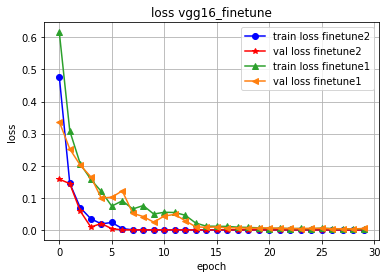

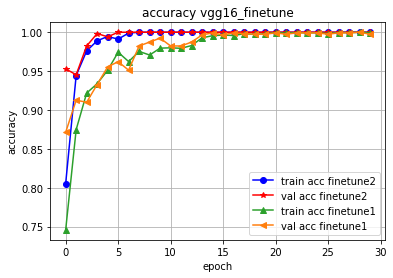

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(V2.history['loss'],'-o', color='b', label='train loss finetune2')
plt.plot(V2.history['val_loss'], '-*', color='r', label='val loss finetune2')
plt.plot(V1.history['loss'],'-^', color='C2', label='train loss finetune1')
plt.plot(V1.history['val_loss'], '-<', color='C1', label='val loss finetune1')

plt.legend()
plt.grid()
plt.title("loss vgg16_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(V2.history['accuracy'],'-o', color='b', label='train acc finetune2')
plt.plot(V2.history['val_accuracy'], '-*', color='r', label='val acc finetune2')
plt.plot(V1.history['accuracy'],'-^', color='C2', label='train acc finetune1')
plt.plot(V1.history['val_accuracy'], '-<', color='C1', label='val acc finetune1')

plt.legend()
plt.title("accuracy vgg16_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

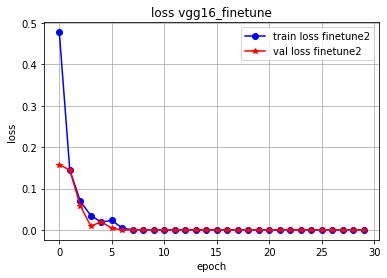

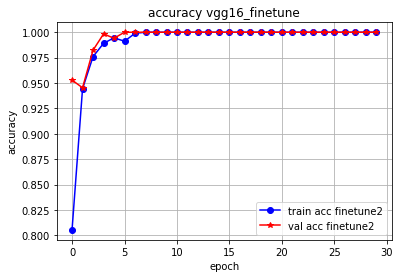

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(V2.history['loss'],'-o', color='b', label='train loss finetune2')
plt.plot(V2.history['val_loss'], '-*', color='r', label='val loss finetune2')


plt.legend()
plt.grid()
plt.title("loss vgg16_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(V2.history['accuracy'],'-o', color='b', label='train acc finetune2')
plt.plot(V2.history['val_accuracy'], '-*', color='r', label='val acc finetune2')

plt.legend()
plt.title("accuracy vgg16_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = VGG16_model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
#y_pred
test_y=test_set.classes
cf_matrix =confusion_matrix(test_y, y_pred)
print(cf_matrix )

[[317   0   0   0]
 [  0 290   0   0]
 [  0   0 320   0]
 [  0   0   0 262]]


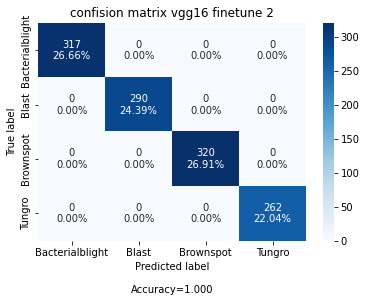

In [ ]:
import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Bacterialblight', 'Blast','Brownspot','Tungro']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',title='confision matrix vgg16 finetune 2')
plt.savefig('confision matrix vgg16 finetune.png')

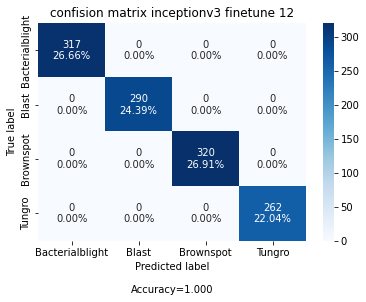

In [ ]:
import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Bacterialblight', 'Blast','Brownspot','Tungro']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',title='confision matrix inceptionv3 finetune 12')
plt.savefig('confision matrix inceptionv3 finetune 12.png')

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=VGG16_model.predict(test_set)
y_pred=np.argmax(y_pred,axis=1)
test_y=test_set.classes
#get classification report
target_names = ['Bacterialblight', 'Blast','Brownspot','Tungro']

print(classification_report(y_pred,test_y, target_names=target_names))

#get confusion matrix
print(confusion_matrix(y_pred,test_y ))

                 precision    recall  f1-score   support

Bacterialblight       1.00      1.00      1.00       317
          Blast       1.00      1.00      1.00       290
      Brownspot       1.00      1.00      1.00       320
         Tungro       1.00      1.00      1.00       262

       accuracy                           1.00      1189
      macro avg       1.00      1.00      1.00      1189
   weighted avg       1.00      1.00      1.00      1189

[[317   0   0   0]
 [  0 290   0   0]
 [  0   0 320   0]
 [  0   0   0 262]]


In [ ]:
import time

# fit the model
# Run the cell. It will take some time to execute

start = time.time()

lrr = ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)


callbacks = [lrr]

V1 = VGG16_model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks,
)

print('Running time: %.4f seconds' % (time.time()-start))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
149/149 [==============================] - 34s 200ms/step - loss: 0.6159 - accuracy: 0.7457 - val_loss: 0.3371 - val_accuracy: 0.8713 - lr: 0.0010
Epoch 2/30
149/149 [==============================] - 28s 187ms/step - loss: 0.3084 - accuracy: 0.8748 - val_loss: 0.2521 - val_accuracy: 0.9125 - lr: 0.0010
Epoch 3/30
149/149 [==============================] - 28s 189ms/step - loss: 0.2057 - accuracy: 0.9218 - val_loss: 0.2016 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 4/30
149/149 [==============================] - 29s 197ms/step - loss: 0.1577 - accuracy: 0.9338 - val_loss: 0.1657 - val_accuracy: 0.9327 - lr: 0.0010
Epoch 5/30
149/149 [==============================] - 29s 191ms/step - loss: 0.1200 - accuracy: 0.9511 - val_loss: 0.0994 - val_accuracy: 0.9554 - lr: 0.0010
Epoch 6/30
149/149 [==============================] - 30s 200ms/step - loss: 0.0741 - accuracy: 0.9743 - val_loss: 0.1018 - val_accuracy: 0.9622 - lr: 0.0010
Epoch 7/30
149/149 [==============================] 

In [ ]:
#Get the accuracy score
batch_size=32

test_score = VGG16_model.evaluate_generator(test_set, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


[INFO] accuracy: 100.00%
[INFO] Loss:  0.00014884638949297369


In [ ]:
#Get the accuracy score V1
batch_size=32

test_score = VGG16_model.evaluate_generator(test_set, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


[INFO] accuracy: 99.71%
[INFO] Loss:  0.0053245387971401215


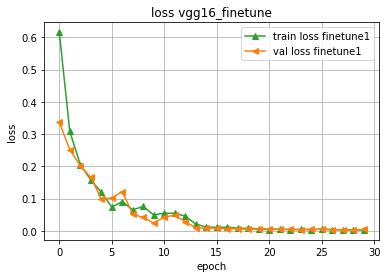

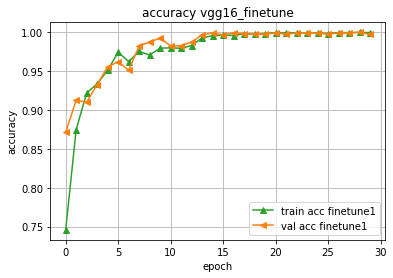

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

#plt.plot(t6.history['loss'],'-o', color='b', label='train loss finetune12')
#plt.plot(t6.history['val_loss'], '-*', color='r', label='val loss finetune12')
plt.plot(V1.history['loss'],'-^', color='C2', label='train loss finetune1')
plt.plot(V1.history['val_loss'], '-<', color='C1', label='val loss finetune1')

plt.legend()
plt.grid()
plt.title("loss vgg16_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
#plt.plot(t6.history['accuracy'],'-o', color='b', label='train acc finetune12')
#plt.plot(t6.history['val_accuracy'], '-*', color='r', label='val acc finetune12')
plt.plot(V1.history['accuracy'],'-^', color='C2', label='train acc finetune1')
plt.plot(V1.history['val_accuracy'], '-<', color='C1', label='val acc finetune1')

plt.legend()
plt.title("accuracy vgg16_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

In [ ]:
# save it as a h5 file
import tensorflow as tf

VGG16_model.save('model_vgg16finetune2.h5')

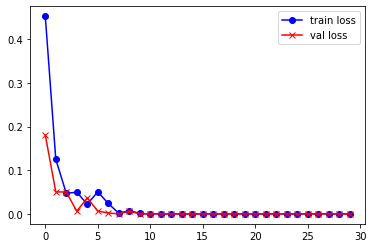

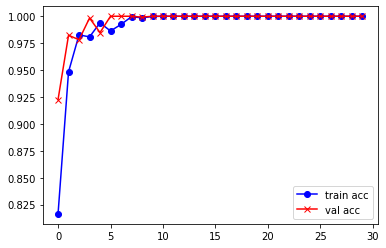

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(VGG16_tune.history['loss'],'b-o', label='train loss')
plt.plot(VGG16_tune.history['val_loss'], 'r-x', label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(VGG16_tune.history['accuracy'],'b-o', label='train acc')
plt.plot(VGG16_tune.history['val_accuracy'], 'r-x', label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = VGG16_model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
#y_pred
test_y=test_set.classes
cf_matrix =confusion_matrix(test_y, y_pred)
print(cf_matrix )

[[317   0   0   0]
 [  0 290   0   0]
 [  0   0 320   0]
 [  0   0   0 262]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = VGG16_model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
#y_pred
test_y=test_set.classes
cf_matrix =confusion_matrix(test_y, y_pred)
print(cf_matrix )

[[314   3   0   0]
 [  0 290   0   0]
 [  0   0 320   0]
 [  0   0   0 262]]


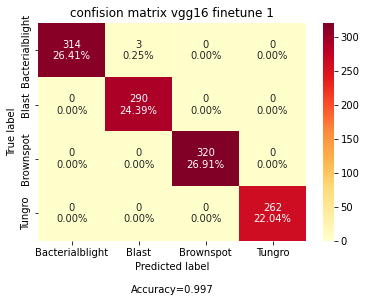

In [ ]:
import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Bacterialblight', 'Blast','Brownspot','Tungro']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='YlOrRd',title='confision matrix vgg16 finetune 1')
plt.savefig('confision matrix vgg16 finetune1.png')#PuRd

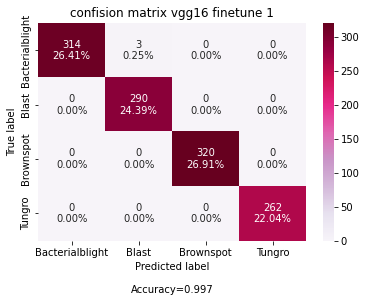

In [ ]:
import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Bacterialblight', 'Blast','Brownspot','Tungro']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='PuRd',title='confision matrix vgg16 finetune 1')
plt.savefig('confision matrix vgg16 finetune1.png')

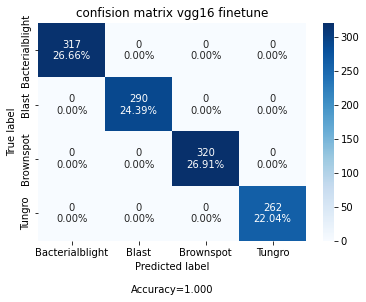

In [ ]:
import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Bacterialblight', 'Blast','Brownspot','Tungro']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',title='confision matrix vgg16 finetune')
plt.savefig('confision matrix vgg16 finetune.png')

In [ ]:
import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Bacterialblight', 'Blast','Brownspot','Tungro']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',title='confision matrix vgg16 finetune')
plt.savefig('confision matrix vgg16 finetune.png')

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=VGG16_model.predict(test_set)
y_pred=np.argmax(y_pred,axis=1)
test_y=test_set.classes
#get classification report
target_names = ['Bacterialblight', 'Blast','Brownspot','Tungro']

print(classification_report(y_pred,test_y, target_names=target_names))

#get confusion matrix
print(confusion_matrix(y_pred,test_y ))

                 precision    recall  f1-score   support

Bacterialblight       1.00      1.00      1.00       317
          Blast       1.00      1.00      1.00       290
      Brownspot       1.00      1.00      1.00       320
         Tungro       1.00      1.00      1.00       262

       accuracy                           1.00      1189
      macro avg       1.00      1.00      1.00      1189
   weighted avg       1.00      1.00      1.00      1189

[[317   0   0   0]
 [  0 290   0   0]
 [  0   0 320   0]
 [  0   0   0 262]]


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=VGG16_model.predict(test_set)
y_pred=np.argmax(y_pred,axis=1)
test_y=test_set.classes
#get classification report
target_names = ['Bacterialblight', 'Blast','Brownspot','Tungro']

print(classification_report(y_pred,test_y, target_names=target_names))

#get confusion matrix
print(confusion_matrix(y_pred,test_y ))

                 precision    recall  f1-score   support

Bacterialblight       0.99      1.00      1.00       314
          Blast       1.00      0.99      0.99       293
      Brownspot       1.00      1.00      1.00       320
         Tungro       1.00      1.00      1.00       262

       accuracy                           1.00      1189
      macro avg       1.00      1.00      1.00      1189
   weighted avg       1.00      1.00      1.00      1189

[[314   0   0   0]
 [  3 290   0   0]
 [  0   0 320   0]
 [  0   0   0 262]]


vgg16 without finetune

In [ ]:
# -*- coding: utf-8 -*-
import os
import tensorflow as tf #tf 2.0.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
from keras.applications.vgg16 import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
base_dir = '/content/drive/MyDrive/Dataset2_split'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

In [ ]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))
    labels = np.zeros(shape=(sample_count, 4))

    generator = ImageDataGenerator(rescale=1./255).flow_from_directory(directory,
        target_size=(224, 224,),
        batch_size = batch_size, 
        class_mode='categorical')

    i = 0

    print('Entering for loop...');

    
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [ ]:
train_features, train_labels = extract_features(train_dir, 4743)
validation_features, validation_labels = extract_features(validation_dir, 1189)

Found 4743 images belonging to 4 classes.
Entering for loop...
Found 1189 images belonging to 4 classes.
Entering for loop...


In [ ]:
train_features = np.reshape(train_features, ( 4743, 7 * 7 * 512))
validation_features = np.reshape(validation_features, (1189, 7 * 7 * 512))

In [ ]:
import os
import shutil
from os.path import isfile, join, abspath, exists, isdir, expanduser
from os import listdir, makedirs, getcwd, remove
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import matplotlib.image as mimg
# plotly
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

import tensorflow as tf
from plotly.graph_objs import *
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras import layers
from keras import models
from keras import optimizers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(2048, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 2048)              51382272  
                                                                 
 dropout_12 (Dropout)        (None, 2048)              0         
                                                                 
 dense_19 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_20 (Dense)            (None, 128)               65664     
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_21 (Dense)            (None, 4)                

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [ ]:
import time

start = time.time()


vgg16_wo_tune = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=16,
                    validation_data=(validation_features, validation_labels))


print('Running time: %.4f seconds' % (time.time()-start))

Epoch 1/30
297/297 [==============================] - 8s 26ms/step - loss: 1.2421 - accuracy: 0.5208 - val_loss: 0.5677 - val_accuracy: 0.7696
Epoch 2/30
297/297 [==============================] - 7s 25ms/step - loss: 0.6781 - accuracy: 0.7324 - val_loss: 0.3600 - val_accuracy: 0.8444
Epoch 3/30
297/297 [==============================] - 7s 25ms/step - loss: 0.4510 - accuracy: 0.8273 - val_loss: 0.2909 - val_accuracy: 0.9008
Epoch 4/30
297/297 [==============================] - 7s 25ms/step - loss: 0.2974 - accuracy: 0.8857 - val_loss: 0.1422 - val_accuracy: 0.9378
Epoch 5/30
297/297 [==============================] - 7s 25ms/step - loss: 0.2137 - accuracy: 0.9203 - val_loss: 0.1433 - val_accuracy: 0.9453
Epoch 6/30
297/297 [==============================] - 7s 25ms/step - loss: 0.1590 - accuracy: 0.9481 - val_loss: 0.1152 - val_accuracy: 0.9605
Epoch 7/30
297/297 [==============================] - 7s 25ms/step - loss: 0.1228 - accuracy: 0.9604 - val_loss: 0.0846 - val_accuracy: 0.9790

In [ ]:
import time

start = time.time()


v3 = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=16,
                    validation_data=(validation_features, validation_labels))


print('Running time: %.4f seconds' % (time.time()-start))

Epoch 1/30
297/297 [==============================] - 10s 27ms/step - loss: 1.2947 - accuracy: 0.5123 - val_loss: 0.5018 - val_accuracy: 0.8141
Epoch 2/30
297/297 [==============================] - 7s 24ms/step - loss: 0.6878 - accuracy: 0.7219 - val_loss: 0.3362 - val_accuracy: 0.8831
Epoch 3/30
297/297 [==============================] - 7s 24ms/step - loss: 0.4489 - accuracy: 0.8252 - val_loss: 0.2619 - val_accuracy: 0.8907
Epoch 4/30
297/297 [==============================] - 7s 24ms/step - loss: 0.3067 - accuracy: 0.8821 - val_loss: 0.1712 - val_accuracy: 0.9378
Epoch 5/30
297/297 [==============================] - 7s 24ms/step - loss: 0.2181 - accuracy: 0.9211 - val_loss: 0.1332 - val_accuracy: 0.9504
Epoch 6/30
297/297 [==============================] - 7s 24ms/step - loss: 0.1735 - accuracy: 0.9448 - val_loss: 0.1019 - val_accuracy: 0.9630
Epoch 7/30
297/297 [==============================] - 7s 24ms/step - loss: 0.1321 - accuracy: 0.9561 - val_loss: 0.0607 - val_accuracy: 0.986

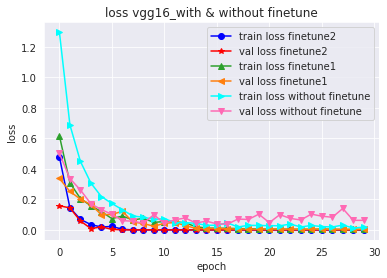

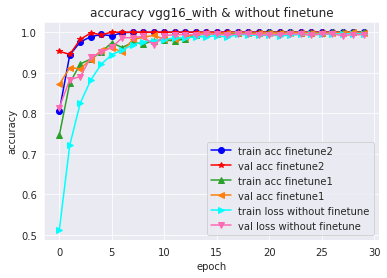

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(V2.history['loss'],'-o', color='b', label='train loss finetune2')
plt.plot(V2.history['val_loss'], '-*', color='r', label='val loss finetune2')
plt.plot(V1.history['loss'],'-^', color='C2', label='train loss finetune1')
plt.plot(V1.history['val_loss'], '-<', color='C1', label='val loss finetune1')
plt.plot(v3.history['loss'],'->', color='cyan', label='train loss without finetune')
plt.plot(v3.history['val_loss'], '-v', color='hotpink', label='val loss without finetune')

plt.legend()

plt.title("loss vgg16_with & without finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(V2.history['accuracy'],'-o', color='b', label='train acc finetune2')
plt.plot(V2.history['val_accuracy'], '-*', color='r', label='val acc finetune2')
plt.plot(V1.history['accuracy'],'-^', color='C2', label='train acc finetune1')
plt.plot(V1.history['val_accuracy'], '-<', color='C1', label='val acc finetune1')
plt.plot(v3.history['accuracy'],'->', color='cyan', label='train loss without finetune')
plt.plot(v3.history['val_accuracy'], '-v', color='hotpink', label='val loss without finetune')

plt.legend()
plt.title("accuracy vgg16_with & without finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.show()
plt.savefig('AccVal_acc.png')

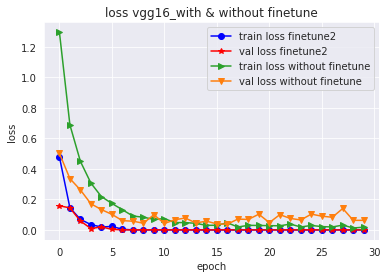

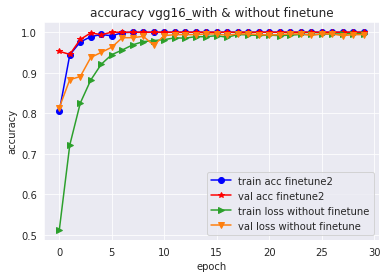

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(V2.history['loss'],'-o', color='b', label='train loss finetune2')
plt.plot(V2.history['val_loss'], '-*', color='r', label='val loss finetune2')

plt.plot(v3.history['loss'],'->', color='C2', label='train loss without finetune')
plt.plot(v3.history['val_loss'], '-v', color='C1', label='val loss without finetune')

plt.legend()

plt.title("loss vgg16_with & without finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(V2.history['accuracy'],'-o', color='b', label='train acc finetune2')
plt.plot(V2.history['val_accuracy'], '-*', color='r', label='val acc finetune2')

plt.plot(v3.history['accuracy'],'->', color='C2', label='train loss without finetune')
plt.plot(v3.history['val_accuracy'], '-v', color='C1', label='val loss without finetune')

plt.legend()
plt.title("accuracy vgg16_with & without finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.show()
plt.savefig('AccVal_acc.png')

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(validation_features, validation_labels, batch_size=32)#با 32 هم مهمینقدر میشه
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 4 samples")
predictions = model.predict(validation_features[:4])
print("predictions shape:", predictions.shape)


Evaluate on test data
38/38 [==============================] - 0s 5ms/step - loss: 0.0628 - accuracy: 0.9941
test loss, test acc: [0.06276381760835648, 0.9941126704216003]
Generate predictions for 4 samples
predictions shape: (4, 4)


In [ ]:
vgg16_wo_tune.history['val_loss']

In [ ]:
vgg16_wo_tune.history['val_accuracy']

In [ ]:
# save it as a h5 file
import tensorflow as tf

model.save('model_vgg16_wo_tune.h5')

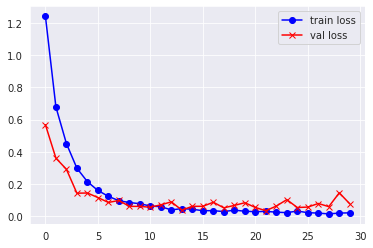

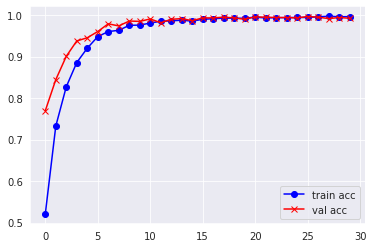

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(vgg16_wo_tune.history['loss'],'b-o', label='train loss')
plt.plot(vgg16_wo_tune.history['val_loss'], 'r-x', label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(vgg16_wo_tune.history['accuracy'],'b-o', label='train acc')
plt.plot(vgg16_wo_tune.history['val_accuracy'], 'r-x', label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')

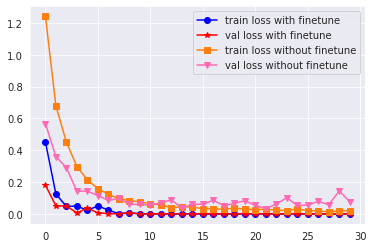

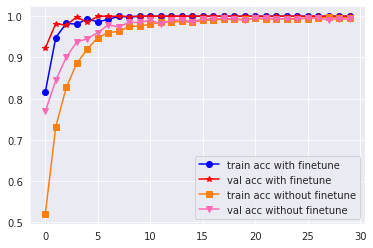

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(VGG16_tune.history['loss'],'b-o', label='train loss with finetune')
plt.plot(VGG16_tune.history['val_loss'], 'r-*', label='val loss with finetune')
plt.plot(vgg16_wo_tune.history['loss'],'-s', color='C1', label='train loss without finetune')
plt.plot(vgg16_wo_tune.history['val_loss'], '-v', color='hotpink', label='val loss without finetune')
plt.legend()
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(VGG16_tune.history['accuracy'],'b-o', label='train acc with finetune')
plt.plot(VGG16_tune.history['val_accuracy'], 'r-*', label='val acc with finetune')
plt.plot(vgg16_wo_tune.history['accuracy'],'-s', color='C1', label='train acc without finetune')
plt.plot(vgg16_wo_tune.history['val_accuracy'], '-v', color='hotpink', label='val acc without finetune')
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')

In [ ]:
plt.plot(tune.history['loss'],'-s', color='aqua', label='train loss')
plt.plot(tune.history['val_loss'], '-v', color='hotpink', label='val loss')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = VGG16_model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
#y_pred
test_y=test_set.classes
cf_matrix =confusion_matrix(test_y, y_pred)
print(cf_matrix )

[[317   0   0   0]
 [  0 290   0   0]
 [  0   0 320   0]
 [  0   0   0 262]]


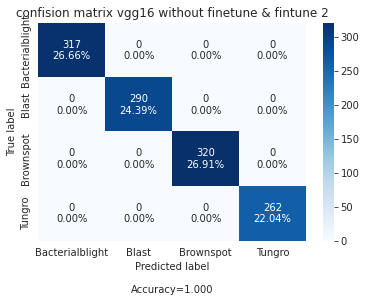

In [ ]:
import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Bacterialblight', 'Blast','Brownspot','Tungro']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',title='confision matrix vgg16 without finetune & fintune 2')
plt.savefig('confision matrix vgg16 .png')

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=VGG16_model.predict(test_set)
y_pred=np.argmax(y_pred,axis=1)
test_y=test_set.classes
#get classification report
target_names = ['Bacterialblight', 'Blast','Brownspot','Tungro']

print(classification_report(y_pred,test_y, target_names=target_names))

#get confusion matrix
print(confusion_matrix(y_pred,test_y ))

                 precision    recall  f1-score   support

Bacterialblight       1.00      1.00      1.00       317
          Blast       1.00      1.00      1.00       290
      Brownspot       1.00      1.00      1.00       320
         Tungro       1.00      1.00      1.00       262

       accuracy                           1.00      1189
      macro avg       1.00      1.00      1.00      1189
   weighted avg       1.00      1.00      1.00      1189

[[317   0   0   0]
 [  0 290   0   0]
 [  0   0 320   0]
 [  0   0   0 262]]


In [ ]:
from tensorflow import keras
#model = keras.models.load_model('path/to/location')
model = keras.models.load_model('/content/model_vgg16finetune2.h5')

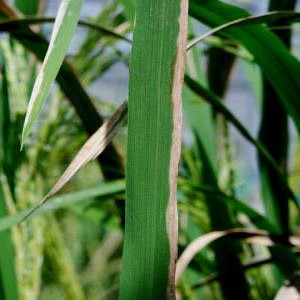

In [ ]:
import sys
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm


model_builder = model
img_size = (224, 224)
#preprocess_input = keras.applications.resnet.preprocess_input
#decode_predictions = keras.applications.resnet.decode_predictions

last_conv_layer_name = "block5_conv3"

myFile = '/content/drive/MyDrive/run folder/Untitled folder/BACTERAILBLIGHT4_009.jpg'  # just for example...
fullPath = os.path.abspath("./" + myFile)  # or similar, depending on your scenario
img_path = keras.utils.get_file(myFile, 'file://'+fullPath)

display(Image(img_path))


In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


Predicted: [[1. 0. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning:


/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning:


/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning:


<string>:6: UserWarning:


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:993: UserWarning:




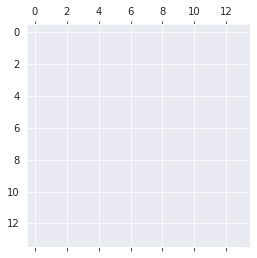

In [ ]:
# Prepare image
img_array = get_img_array(img_path, size=img_size)

# Make model
model = keras.models.load_model('/content/model_vgg16finetune2.h5')

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", (preds))

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, 'block5_conv3')

# Display heatmap
plt.matshow(heatmap)
plt.show()


**resnet152v2**

finetune

In [ ]:
!pip install -U mxnet-cu101==1.7.0

     |███████████████████████████████▌| 834.1 MB 1.4 MB/s eta 0:00:09tcmalloc: large alloc 1147494400 bytes == 0x3a9a8000 @  0x7f644dc9f615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████████████████████| 846.0 MB 20 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
!nvidia-smi

Thu Apr 28 21:31:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    61W / 149W |   8457MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# -*- coding: utf-8 -*-
import os
import tensorflow as tf #tf 2.0.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
# Image `Augmentation` for Increasing Dataset (Run Augmentation.py )

# ImageDataGenerator (in-place augmentation)
train_data_gen = ImageDataGenerator(rescale=1./255)

test_data_gen = ImageDataGenerator(rescale=1./255)


# Make sure you provide the same target size as initialied for the image size
train_generator = train_data_gen.flow_from_directory('/content/drive/MyDrive/Dataset2_split/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_generator = test_data_gen.flow_from_directory('/content/drive/MyDrive/Dataset2_split/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical', 
                                            shuffle=False)

Found 4743 images belonging to 4 classes.
Found 1189 images belonging to 4 classes.


In [ ]:
# ResNet152V2 Model
ResNet_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# The last 15 layers fine tune
for layer in ResNet_model.layers[:-7]:
    layer.trainable = False

In [ ]:
# ResNet152V2 Model
ResNet_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# The last 15 layers fine tune
for layer in ResNet_model.layers[:-6]:
    layer.trainable = False

234561536/234545216 [==============================] - 2s 0us/step


In [ ]:
# ResNet152V2 Model
ResNet_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# The last 15 layers fine tune
for layer in ResNet_model.layers[:-5]:
    layer.trainable = False

In [ ]:
# ResNet152V2 Model
ResNet_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# The last 15 layers fine tune
for layer in ResNet_model.layers[:-4]:
    layer.trainable = False

In [ ]:
x = ResNet_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=4, activation='softmax')(x)
model = Model(ResNet_model.input, output)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [ ]:
import time

start = time.time()

lrr = ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)


callbacks = [lrr]

# model fit_generator
r = model.fit_generator(
  train_generator,
  validation_data=test_generator,
  epochs=30,
  callbacks=callbacks,
)

print('Running time: %.4f mineutes' % (time.time()-start))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
149/149 [==============================] - 1502s 10s/step - loss: 0.2355 - accuracy: 0.9148 - val_loss: 0.0659 - val_accuracy: 0.9882 - lr: 0.0010
Epoch 2/30
149/149 [==============================] - 91s 613ms/step - loss: 0.0582 - accuracy: 0.9812 - val_loss: 0.0544 - val_accuracy: 0.9807 - lr: 0.0010
Epoch 3/30
149/149 [==============================] - 91s 614ms/step - loss: 0.0357 - accuracy: 0.9901 - val_loss: 0.0117 - val_accuracy: 0.9966 - lr: 0.0010
Epoch 4/30
149/149 [==============================] - 91s 613ms/step - loss: 0.0229 - accuracy: 0.9947 - val_loss: 0.0187 - val_accuracy: 0.9907 - lr: 0.0010
Epoch 5/30
149/149 [==============================] - 92s 616ms/step - loss: 0.0297 - accuracy: 0.9928 - val_loss: 0.0084 - val_accuracy: 0.9975 - lr: 0.0010
Epoch 6/30
149/149 [==============================] - 91s 613ms/step - loss: 0.0115 - accuracy: 0.9968 - val_loss: 0.0351 - val_accuracy: 0.9916 - lr: 0.0010
Epoch 7/30
149/149 [==============================] 

In [ ]:
import time

start = time.time()

lrr = ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)


callbacks = [lrr]

# model fit_generator
m = model.fit_generator(
  train_generator,
  validation_data=test_generator,
  epochs=30,
  callbacks=callbacks,
)

print('Running time: %.4f mineutes' % (time.time()-start))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
149/149 [==============================] - 93s 620ms/step - loss: 0.0613 - accuracy: 0.9804 - val_loss: 0.5109 - val_accuracy: 0.9201 - lr: 0.0010
Epoch 2/30
149/149 [==============================] - 93s 626ms/step - loss: 0.0944 - accuracy: 0.9724 - val_loss: 0.1374 - val_accuracy: 0.9706 - lr: 0.0010
Epoch 3/30
149/149 [==============================] - 91s 609ms/step - loss: 0.0390 - accuracy: 0.9882 - val_loss: 0.1110 - val_accuracy: 0.9722 - lr: 0.0010
Epoch 4/30
149/149 [==============================] - 91s 613ms/step - loss: 0.0666 - accuracy: 0.9823 - val_loss: 0.0284 - val_accuracy: 0.9899 - lr: 0.0010
Epoch 5/30
149/149 [==============================] - 91s 611ms/step - loss: 0.0087 - accuracy: 0.9973 - val_loss: 0.0100 - val_accuracy: 0.9958 - lr: 0.0010
Epoch 6/30
149/149 [==============================] - 91s 612ms/step - loss: 0.0221 - accuracy: 0.9943 - val_loss: 0.1046 - val_accuracy: 0.9857 - lr: 0.0010
Epoch 7/30
149/149 [==============================] 

In [ ]:
import time

start = time.time()

lrr = ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)


callbacks = [lrr]

# model fit_generator
k = model.fit_generator(
  train_generator,
  validation_data=test_generator,
  epochs=30,
  callbacks=callbacks,
)

print('Running time: %.4f mineutes' % (time.time()-start))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
149/149 [==============================] - 108s 629ms/step - loss: 0.2571 - accuracy: 0.9074 - val_loss: 0.3795 - val_accuracy: 0.8713 - lr: 0.0010
Epoch 2/30
149/149 [==============================] - 89s 598ms/step - loss: 0.0460 - accuracy: 0.9865 - val_loss: 0.8936 - val_accuracy: 0.8293 - lr: 0.0010
Epoch 3/30
149/149 [==============================] - 89s 597ms/step - loss: 0.0529 - accuracy: 0.9842 - val_loss: 0.4872 - val_accuracy: 0.9075 - lr: 0.0010
Epoch 4/30
149/149 [==============================] - 89s 598ms/step - loss: 0.0702 - accuracy: 0.9840 - val_loss: 0.1669 - val_accuracy: 0.9512 - lr: 0.0010
Epoch 5/30
149/149 [==============================] - 89s 598ms/step - loss: 0.0216 - accuracy: 0.9935 - val_loss: 0.0076 - val_accuracy: 0.9992 - lr: 0.0010
Epoch 6/30
149/149 [==============================] - 89s 598ms/step - loss: 0.0057 - accuracy: 0.9977 - val_loss: 0.0192 - val_accuracy: 0.9958 - lr: 0.0010
Epoch 7/30
149/149 [==============================]

In [ ]:
import time

start = time.time()

lrr = ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)


callbacks = [lrr]

# model fit_generator
o = model.fit_generator(
  train_generator,
  validation_data=test_generator,
  epochs=30,
  callbacks=callbacks,
)

print('Running time: %.4f mineutes' % (time.time()-start))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30
149/149 [==============================] - 108s 630ms/step - loss: 0.2252 - accuracy: 0.9211 - val_loss: 0.4551 - val_accuracy: 0.8999 - lr: 0.0010
Epoch 2/30
149/149 [==============================] - 89s 598ms/step - loss: 0.0664 - accuracy: 0.9793 - val_loss: 1.2785 - val_accuracy: 0.8360 - lr: 0.0010
Epoch 3/30
149/149 [==============================] - 89s 598ms/step - loss: 0.0369 - accuracy: 0.9882 - val_loss: 0.0590 - val_accuracy: 0.9832 - lr: 0.0010
Epoch 4/30
149/149 [==============================] - 89s 597ms/step - loss: 0.0349 - accuracy: 0.9911 - val_loss: 0.8265 - val_accuracy: 0.8486 - lr: 0.0010
Epoch 5/30
149/149 [==============================] - 89s 598ms/step - loss: 0.0447 - accuracy: 0.9867 - val_loss: 0.3431 - val_accuracy: 0.9243 - lr: 0.0010
Epoch 6/30
149/149 [==============================] - 89s 597ms/step - loss: 0.0464 - accuracy: 0.9880 - val_loss: 0.0314 - val_accuracy: 0.9849 - lr: 0.0010
Epoch 7/30
149/149 [==============================]

In [ ]:
#Get the accuracy score
batch_size=32
test_score = model.evaluate_generator(test_generator, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


[INFO] accuracy: 100.00%
[INFO] Loss:  0.0004179892421234399


In [ ]:
#Get the accuracy score
batch_size=32
test_score = model.evaluate_generator(test_generator, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


[INFO] accuracy: 100.00%
[INFO] Loss:  0.0005033236811868846


In [ ]:
#Get the accuracy score
batch_size=32
test_score = model.evaluate_generator(test_generator, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


[INFO] accuracy: 100.00%
[INFO] Loss:  0.0009626480168662965


In [ ]:
#Get the accuracy score
batch_size=32
test_score = model.evaluate_generator(test_generator, batch_size)


print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


[INFO] accuracy: 99.61%
[INFO] Loss:  0.016817297786474228


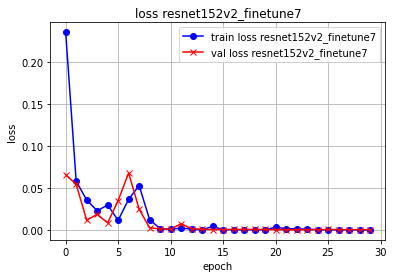

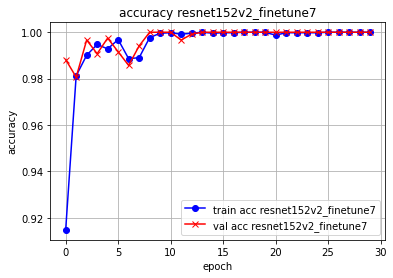

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'],'b-o', label='train loss resnet152v2_finetune7')
plt.plot(r.history['val_loss'], 'r-x', label='val loss resnet152v2_finetune7')
plt.legend()
plt.grid()
plt.title("loss resnet152v2_finetune7")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(r.history['accuracy'],'b-o', label='train acc resnet152v2_finetune7')
plt.plot(r.history['val_accuracy'], 'r-x', label='val acc resnet152v2_finetune7')
plt.legend()
plt.grid()
plt.title("accuracy resnet152v2_finetune7")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()
plt.savefig('AccVal_acc.png')

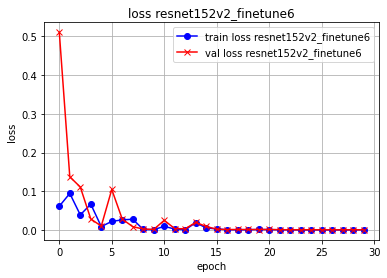

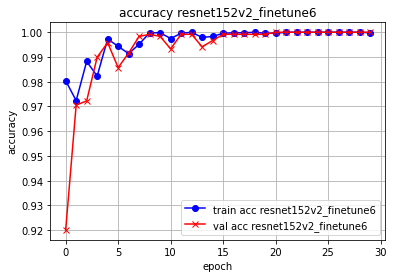

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(m.history['loss'],'b-o', label='train loss resnet152v2_finetune6')
plt.plot(m.history['val_loss'], 'r-x', label='val loss resnet152v2_finetune6')
plt.legend()
plt.grid()
plt.title("loss resnet152v2_finetune6")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(m.history['accuracy'],'b-o', label='train acc resnet152v2_finetune6')
plt.plot(m.history['val_accuracy'], 'r-x', label='val acc resnet152v2_finetune6')
plt.legend()
plt.title("accuracy resnet152v2_finetune6")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

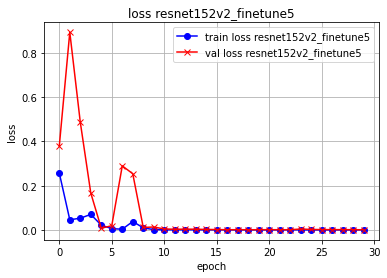

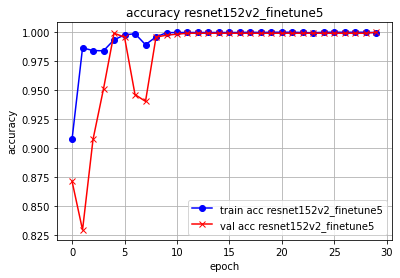

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(k.history['loss'],'b-o', label='train loss resnet152v2_finetune5')
plt.plot(k.history['val_loss'], 'r-x', label='val loss resnet152v2_finetune5')
plt.legend()
plt.grid()
plt.title("loss resnet152v2_finetune5")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(k.history['accuracy'],'b-o', label='train acc resnet152v2_finetune5')
plt.plot(k.history['val_accuracy'], 'r-x', label='val acc resnet152v2_finetune5')
plt.legend()
plt.title("accuracy resnet152v2_finetune5")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

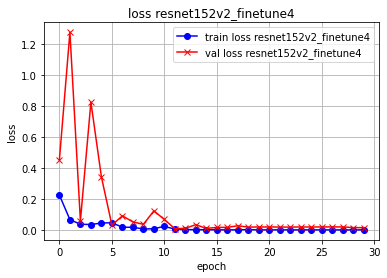

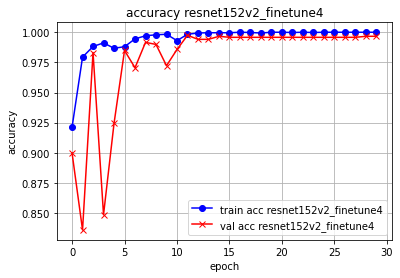

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(o.history['loss'],'b-o', label='train loss resnet152v2_finetune4')
plt.plot(o.history['val_loss'], 'r-x', label='val loss resnet152v2_finetune4')
plt.legend()
plt.grid()
plt.title("loss resnet152v2_finetune4")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(o.history['accuracy'],'b-o', label='train acc resnet152v2_finetune4')
plt.plot(o.history['val_accuracy'], 'r-x', label='val acc resnet152v2_finetune4')
plt.legend()
plt.title("accuracy resnet152v2_finetune4")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

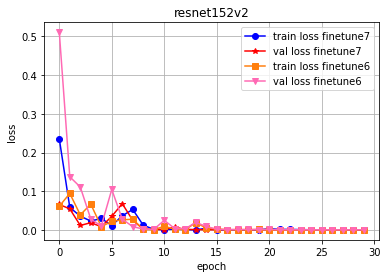

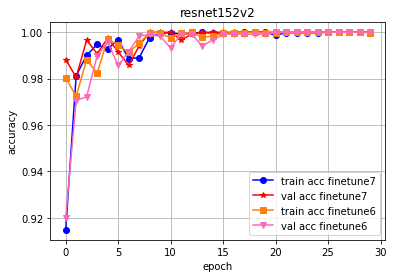

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'],'b-o', label='train loss finetune7')
plt.plot(r.history['val_loss'], 'r-*', label='val loss finetune7')
plt.plot(m.history['loss'],'-s', color='C1', label='train loss finetune6')
plt.plot(m.history['val_loss'], '-v', color='hotpink', label='val loss finetune6')
plt.title("resnet152v2")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(r.history['accuracy'],'b-o', label='train acc finetune7')
plt.plot(r.history['val_accuracy'], 'r-*', label='val acc finetune7')
plt.plot(m.history['accuracy'],'-s', color='C1', label='train acc finetune6')
plt.plot(m.history['val_accuracy'], '-v', color='hotpink', label='val acc finetune6')
plt.title("resnet152v2")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.legend()
plt.show()
plt.savefig('AccVal_acc.png')

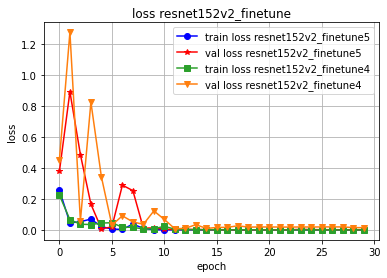

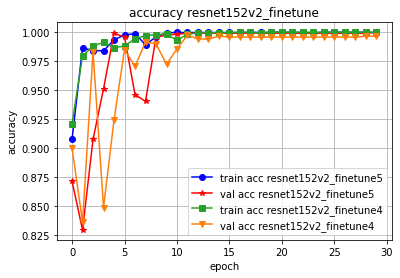

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(k.history['loss'],'b-o', label='train loss resnet152v2_finetune5')
plt.plot(k.history['val_loss'], 'r-*', label='val loss resnet152v2_finetune5')
plt.plot(o.history['loss'],'-s', color='C2', label='train loss resnet152v2_finetune4')
plt.plot(o.history['val_loss'], '-v', color='C1', label='val loss resnet152v2_finetune4')
plt.legend()
plt.grid()
plt.title("loss resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(k.history['accuracy'],'b-o', label='train acc resnet152v2_finetune5')
plt.plot(k.history['val_accuracy'], 'r-*', label='val acc resnet152v2_finetune5')
plt.plot(o.history['accuracy'],'-s', color='C2', label='train acc resnet152v2_finetune4')
plt.plot(o.history['val_accuracy'], '-v', color='C1', label='val acc resnet152v2_finetune4')
plt.legend()
plt.title("accuracy resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

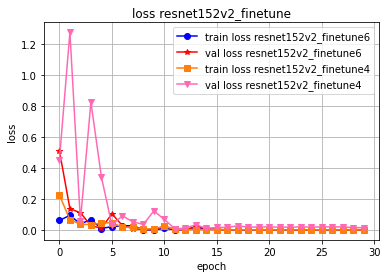

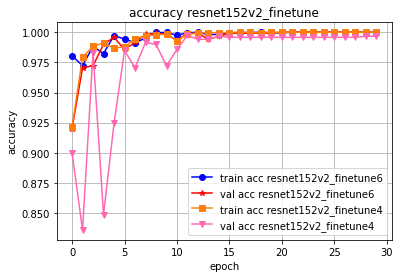

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(m.history['loss'],'b-o', label='train loss resnet152v2_finetune6')
plt.plot(m.history['val_loss'], 'r-*', label='val loss resnet152v2_finetune6')
plt.plot(o.history['loss'],'-s', color='C1', label='train loss resnet152v2_finetune4')
plt.plot(o.history['val_loss'], '-v', color='hotpink', label='val loss resnet152v2_finetune4')
plt.legend()
plt.grid()
plt.title("loss resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(m.history['accuracy'],'b-o', label='train acc resnet152v2_finetune6')
plt.plot(m.history['val_accuracy'], 'r-*', label='val acc resnet152v2_finetune6')
plt.plot(o.history['accuracy'],'-s', color='C1', label='train acc resnet152v2_finetune4')
plt.plot(o.history['val_accuracy'], '-v', color='hotpink', label='val acc resnet152v2_finetune4')
plt.legend()
plt.title("accuracy resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

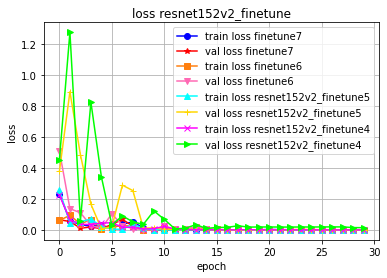

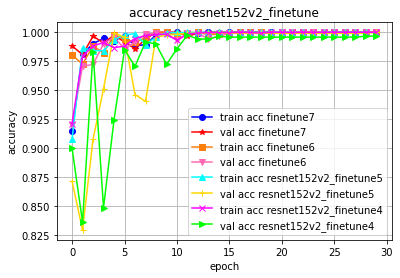

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'],'b-o', label='train loss finetune7')
plt.plot(r.history['val_loss'], 'r-*', label='val loss finetune7')
plt.plot(m.history['loss'],'-s', color='C1', label='train loss finetune6')
plt.plot(m.history['val_loss'], '-v', color='hotpink', label='val loss finetune6')
plt.plot(k.history['loss'],'-^', color='cyan', label='train loss resnet152v2_finetune5')
plt.plot(k.history['val_loss'], '-+', color='gold', label='val loss resnet152v2_finetune5')
plt.plot(o.history['loss'],'-x', color='fuchsia', label='train loss resnet152v2_finetune4')
plt.plot(o.history['val_loss'], '->', color='lime', label='val loss resnet152v2_finetune4')
plt.legend()
plt.grid()
plt.title("loss resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(r.history['accuracy'],'b-o', label='train acc finetune7')
plt.plot(r.history['val_accuracy'], 'r-*', label='val acc finetune7')
plt.plot(m.history['accuracy'],'-s', color='C1', label='train acc finetune6')
plt.plot(m.history['val_accuracy'], '-v', color='hotpink', label='val acc finetune6')
plt.plot(k.history['accuracy'],'-^', color='cyan', label='train acc resnet152v2_finetune5')
plt.plot(k.history['val_accuracy'], '-+', color='gold', label='val acc resnet152v2_finetune5')
plt.plot(o.history['accuracy'],'-x', color='fuchsia', label='train acc resnet152v2_finetune4')
plt.plot(o.history['val_accuracy'], '->', color='lime', label='val acc resnet152v2_finetune4')
plt.legend()
plt.title("accuracy resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

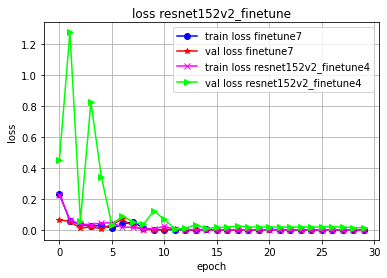

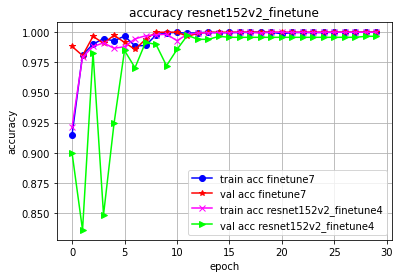

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'],'b-o', label='train loss finetune7')
plt.plot(r.history['val_loss'], 'r-*', label='val loss finetune7')
#plt.plot(m.history['loss'],'-s', color='C1', label='train loss finetune6')
#plt.plot(m.history['val_loss'], '-v', color='hotpink', label='val loss finetune6')
#plt.plot(k.history['loss'],'-^', color='cyan', label='train loss resnet152v2_finetune5')
#plt.plot(k.history['val_loss'], '-+', color='gold', label='val loss resnet152v2_finetune5')
plt.plot(o.history['loss'],'-x', color='lime', label='train loss resnet152v2_finetune4')
plt.plot(o.history['val_loss'], '->', color='fuchsia', label='val loss resnet152v2_finetune4')
plt.legend()
plt.grid()
plt.title("loss resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(r.history['accuracy'],'b-o', label='train acc finetune7')
plt.plot(r.history['val_accuracy'], 'r-*', label='val acc finetune7')
#plt.plot(m.history['accuracy'],'-s', color='C1', label='train acc finetune6')
#plt.plot(m.history['val_accuracy'], '-v', color='hotpink', label='val acc finetune6')
#plt.plot(k.history['accuracy'],'-^', color='cyan', label='train acc resnet152v2_finetune5')
#plt.plot(k.history['val_accuracy'], '-+', color='gold', label='val acc resnet152v2_finetune5')
plt.plot(o.history['accuracy'],'-x', color='lime', label='train acc resnet152v2_finetune4')
plt.plot(o.history['val_accuracy'], '->', color='fuchsia', label='val acc resnet152v2_finetune4')
plt.legend()
plt.title("accuracy resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'],'b-o', label='train loss finetune7')
plt.plot(r.history['val_loss'], 'r-*', label='val loss finetune7')
#plt.plot(m.history['loss'],'-s', color='C1', label='train loss finetune6')
#plt.plot(m.history['val_loss'], '-v', color='hotpink', label='val loss finetune6')
#plt.plot(k.history['loss'],'-^', color='cyan', label='train loss resnet152v2_finetune5')
#plt.plot(k.history['val_loss'], '-+', color='gold', label='val loss resnet152v2_finetune5')
plt.plot(o.history['loss'],'-x', color='lime', label='train loss resnet152v2_finetune4')
plt.plot(o.history['val_loss'], '->', color='fuchsia', label='val loss resnet152v2_finetune4')
plt.legend()
plt.grid()
plt.title("loss resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(r.history['accuracy'],'b-o', label='train acc finetune7')
plt.plot(r.history['val_accuracy'], 'r-*', label='val acc finetune7')
#plt.plot(m.history['accuracy'],'-s', color='C1', label='train acc finetune6')
#plt.plot(m.history['val_accuracy'], '-v', color='hotpink', label='val acc finetune6')
#plt.plot(k.history['accuracy'],'-^', color='cyan', label='train acc resnet152v2_finetune5')
#plt.plot(k.history['val_accuracy'], '-+', color='gold', label='val acc resnet152v2_finetune5')
plt.plot(o.history['accuracy'],'-x', color='lime', label='train acc resnet152v2_finetune4')
plt.plot(o.history['val_accuracy'], '->', color='fuchsia', label='val acc resnet152v2_finetune4')
plt.legend()
plt.title("accuracy resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

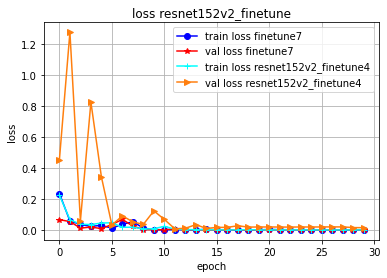

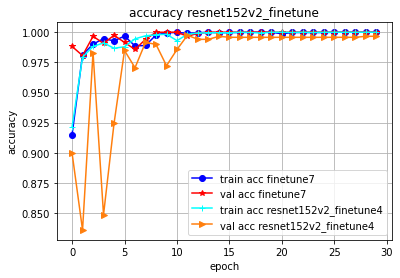

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'],'b-o', label='train loss finetune7')
plt.plot(r.history['val_loss'], 'r-*', label='val loss finetune7')
#plt.plot(m.history['loss'],'-s', color='C1', label='train loss finetune6')
#plt.plot(m.history['val_loss'], '-v', color='hotpink', label='val loss finetune6')
#plt.plot(k.history['loss'],'-^', color='cyan', label='train loss resnet152v2_finetune5')
#plt.plot(k.history['val_loss'], '-+', color='gold', label='val loss resnet152v2_finetune5')
plt.plot(o.history['loss'],'-+', color='cyan', label='train loss resnet152v2_finetune4')
plt.plot(o.history['val_loss'], '->', color='C1', label='val loss resnet152v2_finetune4')
plt.legend()
plt.grid()
plt.title("loss resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(r.history['accuracy'],'b-o', label='train acc finetune7')
plt.plot(r.history['val_accuracy'], 'r-*', label='val acc finetune7')
#plt.plot(m.history['accuracy'],'-s', color='C1', label='train acc finetune6')
#plt.plot(m.history['val_accuracy'], '-v', color='hotpink', label='val acc finetune6')
#plt.plot(k.history['accuracy'],'-^', color='cyan', label='train acc resnet152v2_finetune5')
#plt.plot(k.history['val_accuracy'], '-+', color='gold', label='val acc resnet152v2_finetune5')
plt.plot(o.history['accuracy'],'-+', color='cyan', label='train acc resnet152v2_finetune4')
plt.plot(o.history['val_accuracy'], '->', color='C1', label='val acc resnet152v2_finetune4')
plt.legend()
plt.title("accuracy resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

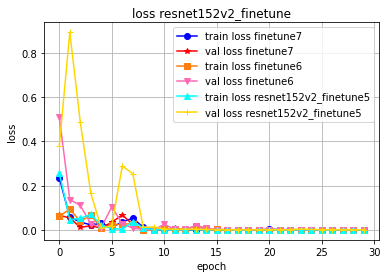

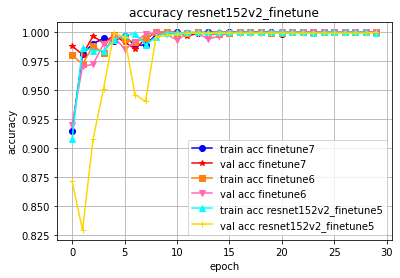

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'],'b-o', label='train loss finetune7')
plt.plot(r.history['val_loss'], 'r-*', label='val loss finetune7')
plt.plot(m.history['loss'],'-s', color='C1', label='train loss finetune6')
plt.plot(m.history['val_loss'], '-v', color='hotpink', label='val loss finetune6')
plt.plot(k.history['loss'],'-^', color='cyan', label='train loss resnet152v2_finetune5')
plt.plot(k.history['val_loss'], '-+', color='gold', label='val loss resnet152v2_finetune5')
#plt.plot(o.history['loss'],'-x', color='lime', label='train loss resnet152v2_finetune4')
#plt.plot(o.history['val_loss'], '->', color='fuchsia', label='val loss resnet152v2_finetune4')
plt.legend()
plt.grid()
plt.title("loss resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(r.history['accuracy'],'b-o', label='train acc finetune7')
plt.plot(r.history['val_accuracy'], 'r-*', label='val acc finetune7')
plt.plot(m.history['accuracy'],'-s', color='C1', label='train acc finetune6')
plt.plot(m.history['val_accuracy'], '-v', color='hotpink', label='val acc finetune6')
plt.plot(k.history['accuracy'],'-^', color='cyan', label='train acc resnet152v2_finetune5')
plt.plot(k.history['val_accuracy'], '-+', color='gold', label='val acc resnet152v2_finetune5')
#plt.plot(o.history['accuracy'],'-x', color='lime', label='train acc resnet152v2_finetune4')
#plt.plot(o.history['val_accuracy'], '->', color='fuchsia', label='val acc resnet152v2_finetune4')
plt.legend()
plt.title("accuracy resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

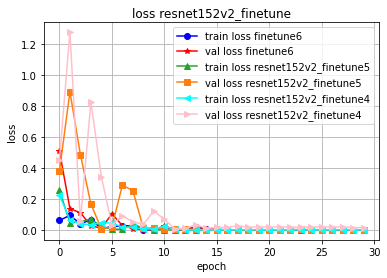

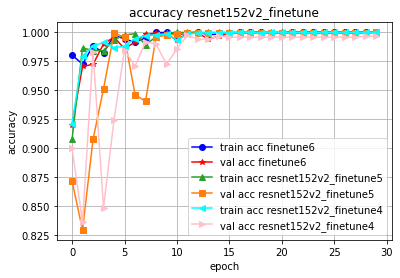

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
#plt.plot(r.history['loss'],'b-o', label='train loss finetune7')
#plt.plot(r.history['val_loss'], 'r-*', label='val loss finetune7')
plt.plot(m.history['loss'],'b-o', label='train loss finetune6')
plt.plot(m.history['val_loss'], 'r-*', label='val loss finetune6')
plt.plot(k.history['loss'],'-^', color='C2', label='train loss resnet152v2_finetune5')
plt.plot(k.history['val_loss'], '-s', color='C1', label='val loss resnet152v2_finetune5')
plt.plot(o.history['loss'],'-<', color='cyan', label='train loss resnet152v2_finetune4')
plt.plot(o.history['val_loss'], '->', color='pink', label='val loss resnet152v2_finetune4')
plt.legend()
plt.grid()
plt.title("loss resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
#plt.plot(r.history['accuracy'],'b-o', label='train acc finetune7')
#plt.plot(r.history['val_accuracy'], 'r-*', label='val acc finetune7')
plt.plot(m.history['accuracy'],'b-o', label='train acc finetune6')
plt.plot(m.history['val_accuracy'], 'r-*', label='val acc finetune6')
plt.plot(k.history['accuracy'],'-^', color='C2', label='train acc resnet152v2_finetune5')
plt.plot(k.history['val_accuracy'], '-s', color='C1', label='val acc resnet152v2_finetune5')
plt.plot(o.history['accuracy'],'-<', color='cyan', label='train acc resnet152v2_finetune4')
plt.plot(o.history['val_accuracy'], '->', color='pink', label='val acc resnet152v2_finetune4')
plt.legend()
plt.title("accuracy resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

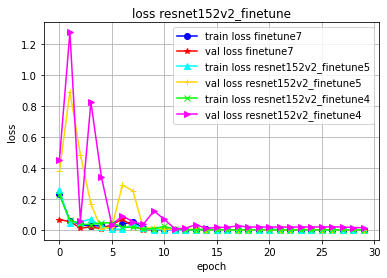

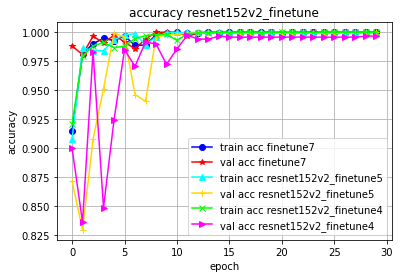

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'],'b-o', label='train loss finetune7')
plt.plot(r.history['val_loss'], 'r-*', label='val loss finetune7')
#plt.plot(m.history['loss'],'-s', color='C1', label='train loss finetune6')
#plt.plot(m.history['val_loss'], '-v', color='hotpink', label='val loss finetune6')
plt.plot(k.history['loss'],'-^', color='cyan', label='train loss resnet152v2_finetune5')
plt.plot(k.history['val_loss'], '-+', color='gold', label='val loss resnet152v2_finetune5')
plt.plot(o.history['loss'],'-x', color='lime', label='train loss resnet152v2_finetune4')
plt.plot(o.history['val_loss'], '->', color='fuchsia', label='val loss resnet152v2_finetune4')
plt.legend()
plt.grid()
plt.title("loss resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(r.history['accuracy'],'b-o', label='train acc finetune7')
plt.plot(r.history['val_accuracy'], 'r-*', label='val acc finetune7')
#plt.plot(m.history['accuracy'],'-s', color='C1', label='train acc finetune6')
#plt.plot(m.history['val_accuracy'], '-v', color='hotpink', label='val acc finetune6')
plt.plot(k.history['accuracy'],'-^', color='cyan', label='train acc resnet152v2_finetune5')
plt.plot(k.history['val_accuracy'], '-+', color='gold', label='val acc resnet152v2_finetune5')
plt.plot(o.history['accuracy'],'-x', color='lime', label='train acc resnet152v2_finetune4')
plt.plot(o.history['val_accuracy'], '->', color='fuchsia', label='val acc resnet152v2_finetune4')
plt.legend()
plt.title("accuracy resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

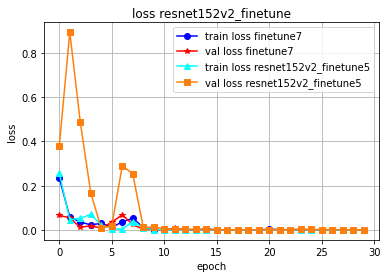

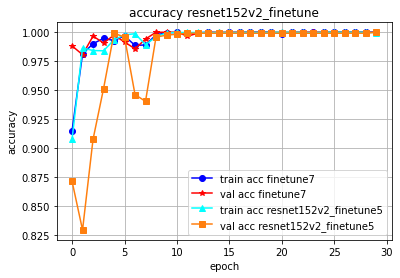

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'],'b-o', label='train loss finetune7')
plt.plot(r.history['val_loss'], 'r-*', label='val loss finetune7')
#plt.plot(m.history['loss'],'-s', color='C1', label='train loss finetune6')
#plt.plot(m.history['val_loss'], '-v', color='hotpink', label='val loss finetune6')
plt.plot(k.history['loss'],'-^', color='cyan', label='train loss resnet152v2_finetune5')
plt.plot(k.history['val_loss'], '-s', color='C1', label='val loss resnet152v2_finetune5')
#plt.plot(o.history['loss'],'-x', color='lime', label='train loss resnet152v2_finetune4')
#plt.plot(o.history['val_loss'], '->', color='fuchsia', label='val loss resnet152v2_finetune4')
plt.legend()
plt.grid()
plt.title("loss resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(r.history['accuracy'],'b-o', label='train acc finetune7')
plt.plot(r.history['val_accuracy'], 'r-*', label='val acc finetune7')
#plt.plot(m.history['accuracy'],'-s', color='C1', label='train acc finetune6')
#plt.plot(m.history['val_accuracy'], '-v', color='hotpink', label='val acc finetune6')
plt.plot(k.history['accuracy'],'-^', color='cyan', label='train acc resnet152v2_finetune5')
plt.plot(k.history['val_accuracy'], '-s', color='C1', label='val acc resnet152v2_finetune5')
#plt.plot(o.history['accuracy'],'-x', color='lime', label='train acc resnet152v2_finetune4')
#plt.plot(o.history['val_accuracy'], '->', color='fuchsia', label='val acc resnet152v2_finetune4')
plt.legend()
plt.title("accuracy resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

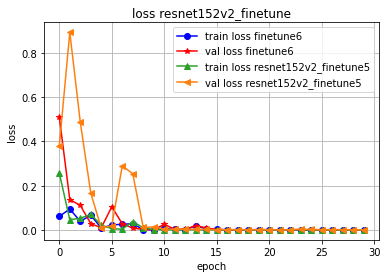

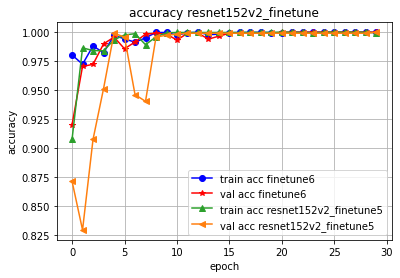

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss

plt.plot(m.history['loss'],'-o', color='b', label='train loss finetune6')
plt.plot(m.history['val_loss'], '-*', color='r', label='val loss finetune6')
plt.plot(k.history['loss'],'-^', color='C2', label='train loss resnet152v2_finetune5')
plt.plot(k.history['val_loss'], '-<', color='C1', label='val loss resnet152v2_finetune5')

plt.legend()
plt.grid()
plt.title("loss resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()
plt.savefig('LossVal_loss.png')

# plot the accuracy
plt.plot(m.history['accuracy'],'-o', color='b', label='train acc finetune6')
plt.plot(m.history['val_accuracy'], '-*', color='r', label='val acc finetune6')
plt.plot(k.history['accuracy'],'-^', color='C2', label='train acc resnet152v2_finetune5')
plt.plot(k.history['val_accuracy'], '-<', color='C1', label='val acc resnet152v2_finetune5')

plt.legend()
plt.title("accuracy resnet152v2_finetune")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid()
plt.show()
plt.savefig('AccVal_acc.png')

In [ ]:
# save it as a h5 file
import tensorflow as tf

model.save('model_resnet152v2_finetune7.h5')

In [ ]:
# save it as a h5 file
import tensorflow as tf

model.save('model_resnet152v2_finetune6.h5')

In [ ]:
# save it as a h5 file
import tensorflow as tf

model.save('model_resnet152v2_finetune5.h5')

In [ ]:
# save it as a h5 file
import tensorflow as tf

model.save('model_resnet152v2_finetune4.h5')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
#y_pred
test_y=test_generator.classes
cf_matrix =confusion_matrix(test_y, y_pred)
print(cf_matrix )

[[317   0   0   0]
 [  0 290   0   0]
 [  0   0 320   0]
 [  0   0   0 262]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
#y_pred
test_y=test_generator.classes
cf_matrix =confusion_matrix(test_y, y_pred)
print(cf_matrix )

[[316   1   0   0]
 [  0 290   0   0]
 [  0   3 317   0]
 [  0   0   0 262]]


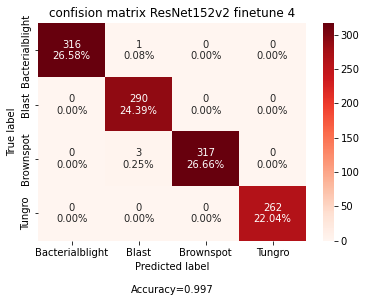

In [ ]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Bacterialblight', 'Blast','Brownspot','Tungro']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Reds',title='confision matrix ResNet152v2 finetune 4') 
plt.savefig('confision matrix resnet152v2 finetune 4.png')
#,figsize=(10,6)

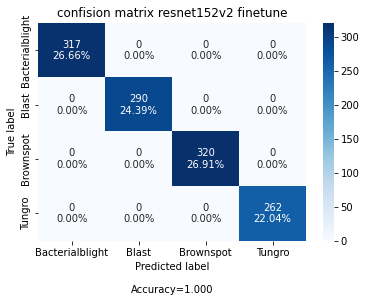

In [ ]:
import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Bacterialblight', 'Blast','Brownspot','Tungro']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues',title='confision matrix resnet152v2 finetune')
plt.savefig('confision matrix resnet152v2 finetune.png')

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=model.predict(test_generator)
y_pred=np.argmax(y_pred,axis=1)
test_y=test_generator.classes
#get classification report
target_names = ['Bacterialblight', 'Blast','Brownspot','Tungro']

print(classification_report(y_pred,test_y, target_names=target_names))

#get confusion matrix
print(confusion_matrix(y_pred,test_y ))

                 precision    recall  f1-score   support

Bacterialblight       1.00      1.00      1.00       317
          Blast       1.00      1.00      1.00       290
      Brownspot       1.00      1.00      1.00       320
         Tungro       1.00      1.00      1.00       262

       accuracy                           1.00      1189
      macro avg       1.00      1.00      1.00      1189
   weighted avg       1.00      1.00      1.00      1189

[[317   0   0   0]
 [  0 290   0   0]
 [  0   0 320   0]
 [  0   0   0 262]]


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=model.predict(test_generator)
y_pred=np.argmax(y_pred,axis=1)
test_y=test_generator.classes
#get classification report
target_names = ['Bacterialblight', 'Blast','Brownspot','Tungro']

print(classification_report(y_pred,test_y, target_names=target_names))

#get confusion matrix
print(confusion_matrix(y_pred,test_y ))

                 precision    recall  f1-score   support

Bacterialblight       1.00      1.00      1.00       316
          Blast       1.00      0.99      0.99       294
      Brownspot       0.99      1.00      1.00       317
         Tungro       1.00      1.00      1.00       262

       accuracy                           1.00      1189
      macro avg       1.00      1.00      1.00      1189
   weighted avg       1.00      1.00      1.00      1189

[[316   0   0   0]
 [  1 290   3   0]
 [  0   0 317   0]
 [  0   0   0 262]]


roc curve resnet152v2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.datasets import  make_classification

In [ ]:
def plot_roc_curve(y_test, y_pred):
  
  n_classes = len(np.unique(y_test))
  y_test = label_binarize(y_test, classes=np.arange(n_classes))
  y_pred = label_binarize(y_pred, classes=np.arange(n_classes))

  # Compute ROC curve and ROC area for each class
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  
  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  #plt.figure(figsize=(10,5))
  plt.figure(dpi=600)
  lw = 2
  plt.plot(fpr["micro"], tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink", linestyle=":", linewidth=4,)

  plt.plot(fpr["macro"], tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy", linestyle=":", linewidth=4,)

  colors = cycle(["aqua", "darkorange", "darkgreen", "yellow", "blue"])
  for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),)

  plt.plot([0, 1], [0, 1], "k--", lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Receiver Operating Characteristic (ROC) curve")
  plt.legend()

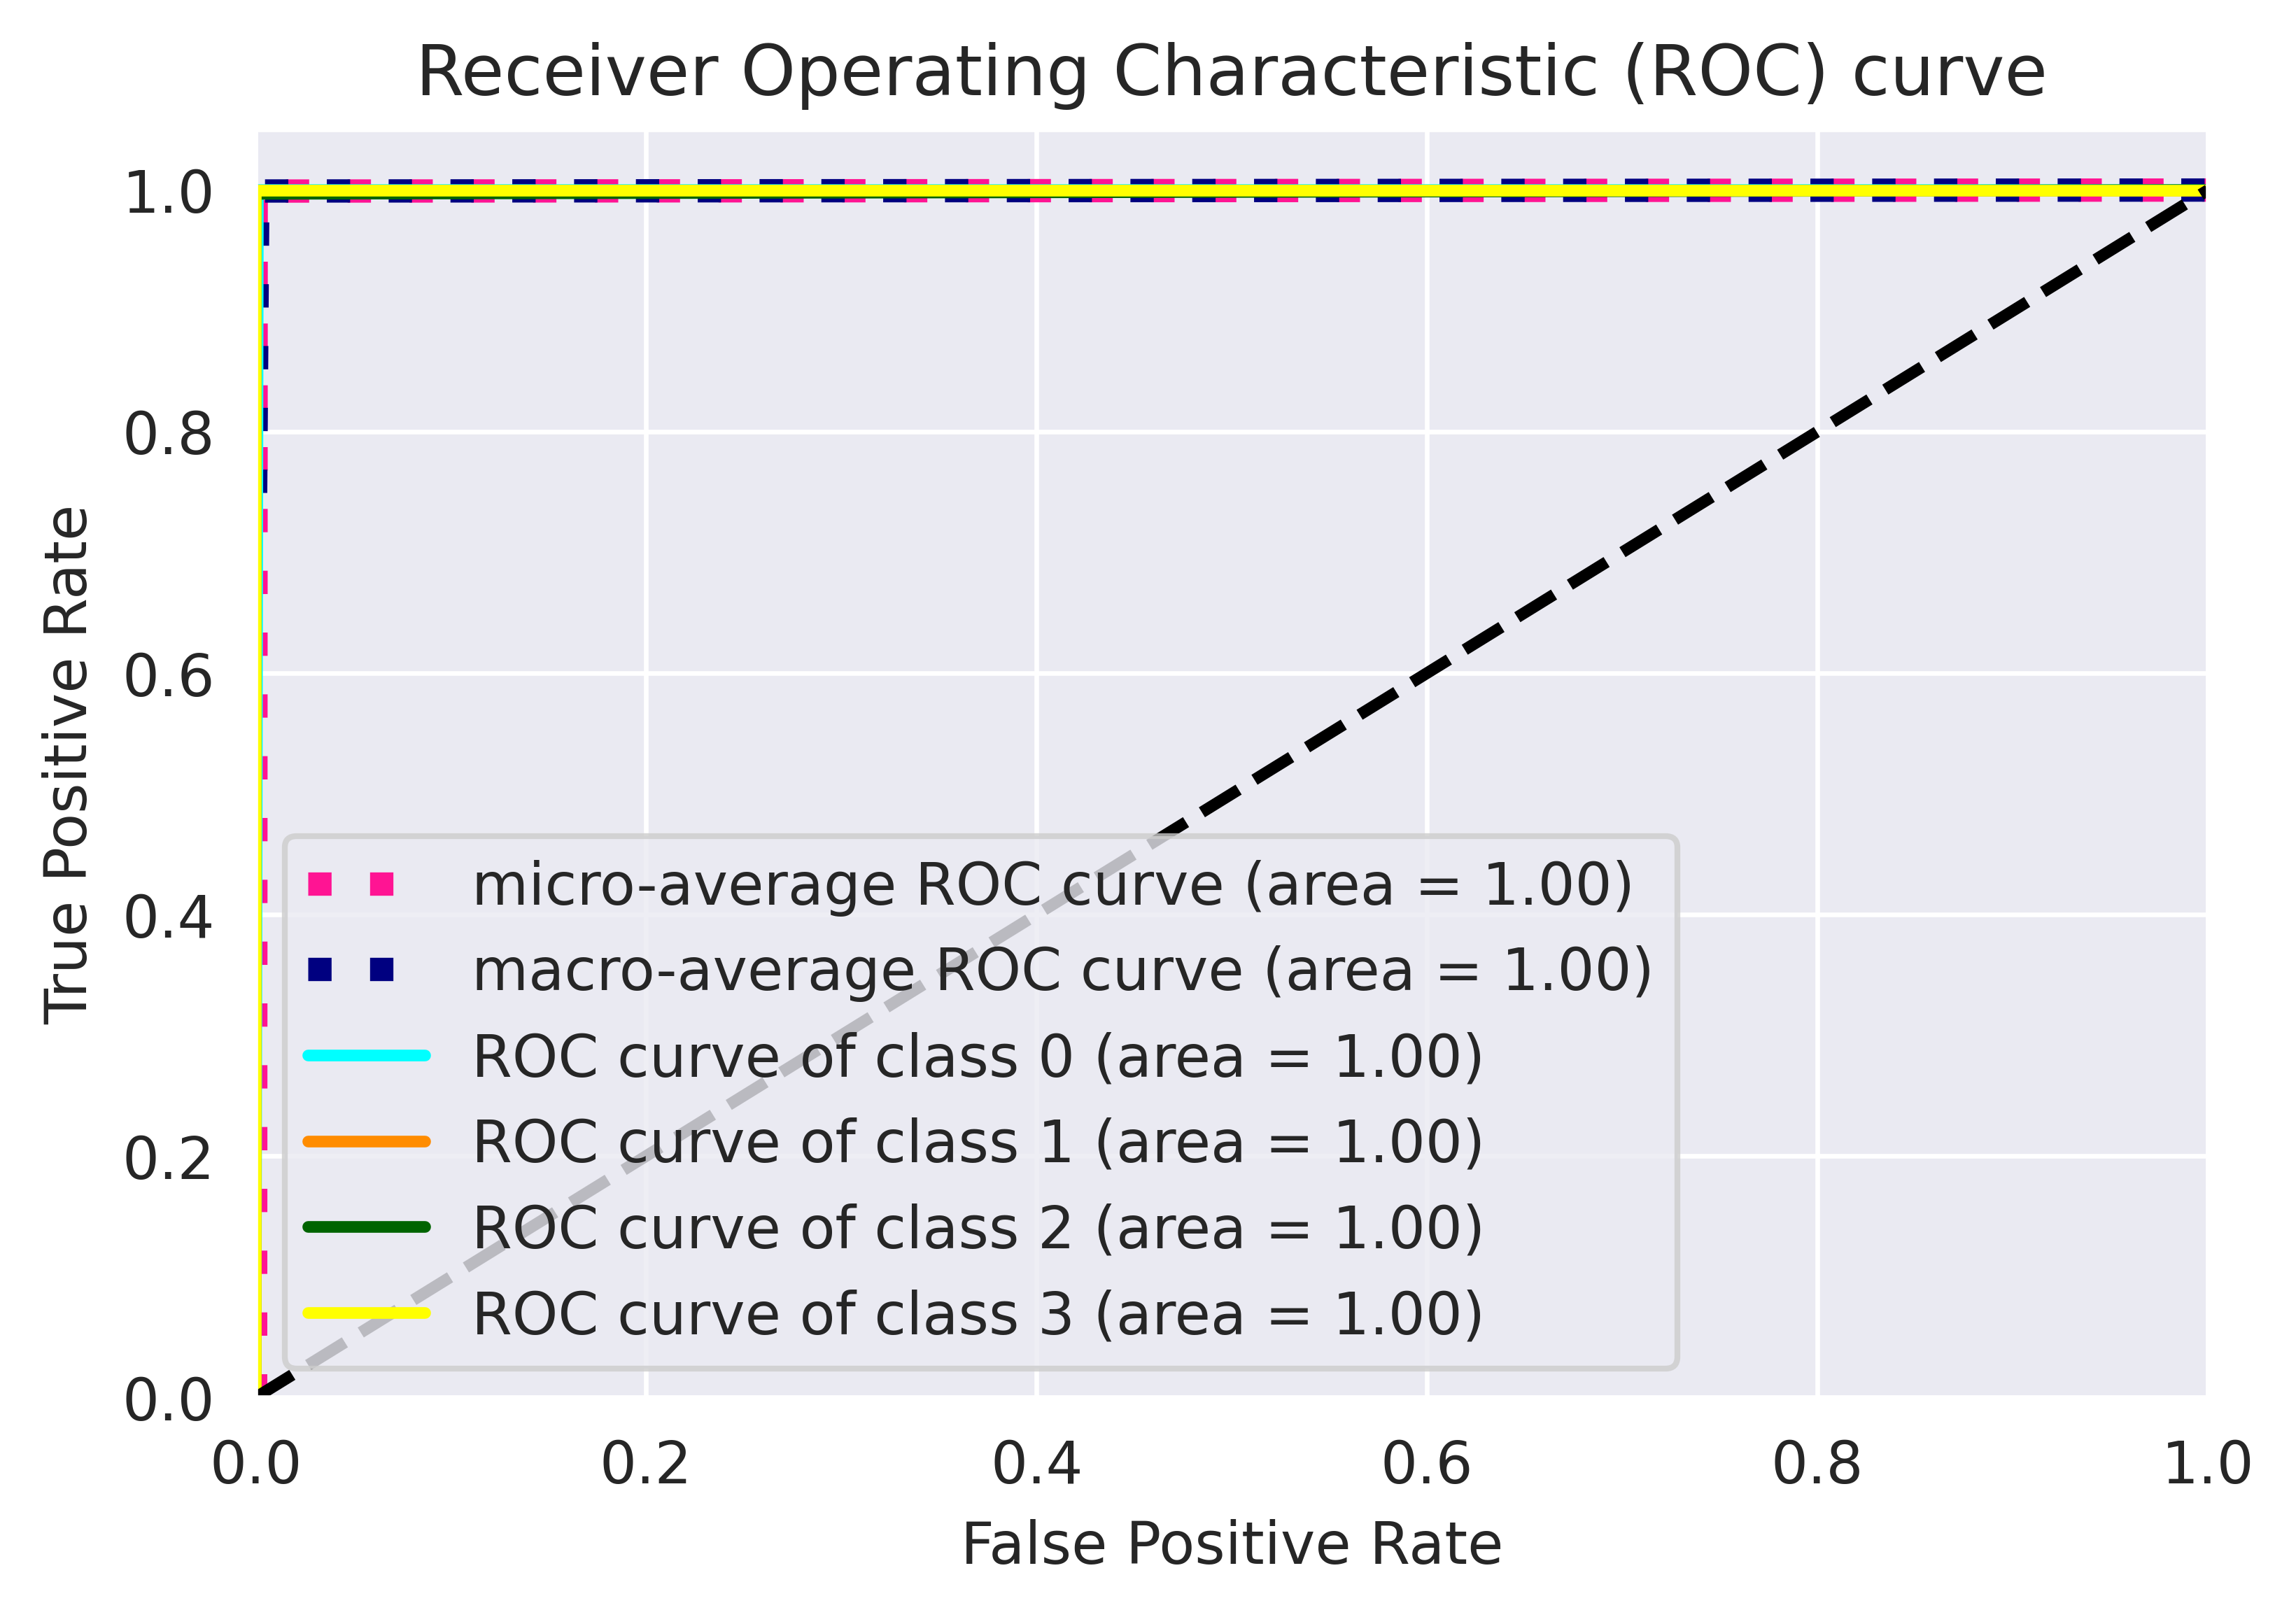

In [ ]:
plot_roc_curve(test_y, y_pred)